Before diving into Time Series Analysis lets go through few basic time based manipulations in python

#### Datetime

In [1]:
from datetime import datetime

In [2]:
#Represent the below values as time
my_year = 2017
my_month = 1
my_day = 2
my_hour = 13
my_minute = 30
my_second = 15

In [3]:
# January 2nd, 2017
my_date = datetime(my_year,my_month,my_day)
my_date

datetime.datetime(2017, 1, 2, 0, 0)

In [4]:
# January 2nd, 2017 at 13:30:15
my_date_time = datetime(my_year,my_month,my_day,my_hour,my_minute,my_second)

Fetch a part of datetime object

In [5]:
my_date.day

2

In [6]:
my_date_time.hour

13

#### NumPy Datetime Arrays
- NumPy handles dates more efficiently than Python's datetime format.
- The NumPy data type is called datetime64 to distinguish it from Python's datetime.

In [7]:
import numpy as np

In [8]:
# CREATE AN ARRAY FROM THREE DATES
np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64')

array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')

<div class="alert alert-info"><strong>NOTE:</strong> We see the dtype listed as <tt>'datetime64[D]'</tt>. This tells us that NumPy applied a day-level date precision.<br>
    If we want we can pass in a different measurement, such as <TT>[h]</TT> for hour or <TT>[Y]</TT> for year.</div>

In [9]:
np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[h]')

array(['2016-03-15T00', '2017-05-24T00', '2018-08-09T00'],
      dtype='datetime64[h]')

In [10]:
np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[Y]')

array(['2016', '2017', '2018'], dtype='datetime64[Y]')

#### NumPy Date Ranges

In [11]:
# AN ARRAY OF DATES FROM 6/1/18 TO 6/22/18 SPACED ONE WEEK APART
np.arange('2018-06-01', '2018-06-23', 7, dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [12]:
# AN ARRAY OF DATES FOR EVERY YEAR FROM 1968 TO 1975
np.arange('1968', '1976', dtype='datetime64[Y]')

array(['1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975'],
      dtype='datetime64[Y]')

#### Pandas Datetime Index
We'll usually deal with time series as a datetime index when working with pandas dataframes. Fortunately pandas has a lot of functions and methods to work with time series!

In [13]:
import pandas as pd

In [14]:
idx = pd.date_range('7/8/2018', periods=7, freq='D')
idx

DatetimeIndex(['2018-07-08', '2018-07-09', '2018-07-10', '2018-07-11',
               '2018-07-12', '2018-07-13', '2018-07-14'],
              dtype='datetime64[ns]', freq='D')

Another way is to convert incoming text with the pd.to_datetime() method:

In [15]:
#any date format could be passed.
idx = pd.to_datetime(['Jan 01, 2018','1/2/18','03-Jan-2018',None])
idx

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', 'NaT'], dtype='datetime64[ns]', freq=None)

A third way is to pass a list or an array of datetime objects into the pd.DatetimeIndex() method:

In [16]:
some_dates = np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')
some_dates

array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')

In [17]:
idx = pd.DatetimeIndex(some_dates)
idx

DatetimeIndex(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[ns]', freq=None)

#### Pandas Datetime Analysis

In [18]:
# Create some random data
data = np.random.randn(3,2)
cols = ['A','B']
print(data)

# Create a DataFrame with our random data, our date index, and our columns
df = pd.DataFrame(data,idx,cols)
df

[[-0.04704137  0.94959546]
 [ 1.13551525 -0.87628257]
 [ 0.04596314  0.25012371]]


A         B
2016-03-15 -0.047041  0.949595
2017-05-24  1.135515 -0.876283
2018-08-09  0.045963  0.250124

In [19]:
df.index

DatetimeIndex(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[ns]', freq=None)

In [20]:
# Latest Date Value
df.index.max()

Timestamp('2018-08-09 00:00:00')

In [21]:
# Latest Date Index Location
df.index.argmax()

2

In [22]:
# Earliest Date Value
df.index.min()

Timestamp('2016-03-15 00:00:00')

In [23]:
# Earliest Date Index Location
df.index.argmin()

0

### Simple Case Study 1
For this exercise we'll look at Starbucks stock data from 2015 to 2018 which includes daily closing prices and trading volumes.

#### Time Resampling

In [49]:
import pandas as pd
%matplotlib inline
pd.set_option('display.max_rows',None)

In [25]:
df = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\starbucks.csv', index_col='Date', parse_dates=True)

In [26]:
df.head()

Close    Volume
Date                         
2015-01-02  38.0061   6906098
2015-01-05  37.2781  11623796
2015-01-06  36.9748   7664340
2015-01-07  37.8848   9732554
2015-01-08  38.4961  13170548

#### resample()

A common operation with time series data is resampling based on the time series index.

In [27]:
#make sure the index is in DatetimeIndex format and not in the string
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

##### What is the yearly means for the close price and volume ?

In [33]:
#resample to the rescue
df.resample(rule = 'A').mean()

Close        Volume
Date                               
2015-12-31  50.078100  8.649190e+06
2016-12-31  53.891732  9.300633e+06
2017-12-31  55.457310  9.296078e+06
2018-12-31  56.870005  1.122883e+07

Resampling rule 'A' takes all of the data points in a given year, applies the aggregation function (in this case we calculate the mean), and reports the result as the last day of that year.

<AxesSubplot:title={'center':'Close Price'}, xlabel='Date'>

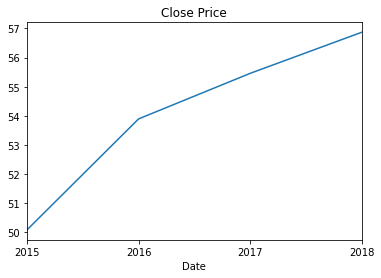

In [37]:
df.resample(rule = 'A').mean()['Close'].plot(title = 'Close Price')

<AxesSubplot:title={'center':'Volume'}, xlabel='Date'>

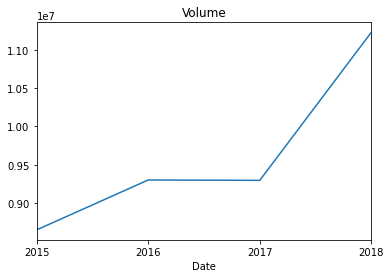

In [38]:
df.resample(rule = 'A').mean()['Volume'].plot(title = 'Volume')

##### Key Observations
- The average Close price increases almost linearly across the years
- The average Volume increased linearly from year 2015-2016,constant from year 2016-2017,steep linear increase from year 2017-2018

#### Custom Resampling Functions

In [39]:
#Returns the first instance of the period, regardless of sampling rate.
def first_day(entry):

    if len(entry):  # handles the case of missing data
        return entry[0]

In [40]:
df.resample(rule='A').apply(first_day)

Close    Volume
Date                         
2015-12-31  38.0061   6906098
2016-12-31  55.0780  13521544
2017-12-31  53.1100   7809307
2018-12-31  56.3243   7215978

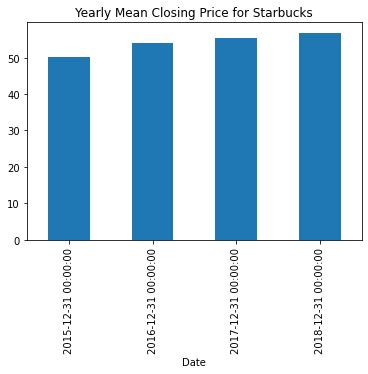

In [41]:
df['Close'].resample('A').mean().plot.bar(title='Yearly Mean Closing Price for Starbucks');

##### What is the monthly Max Closing Price for Starbucks?

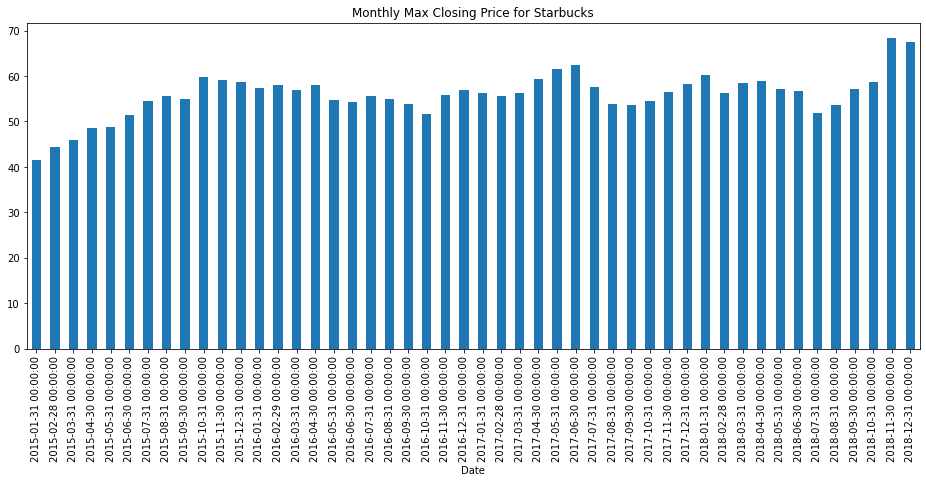

In [42]:
title = 'Monthly Max Closing Price for Starbucks'
df['Close'].resample('M').max().plot.bar(figsize=(16,6), title=title,color='#1f77b4');

- 2018 November had the maximum close price

#### Time Shifting

Sometimes you may need to shift all your data up or down along the time series index.

#### .shift() forward
This method shifts the entire date index a given number of rows, without regard for time periods (months & years).

In [43]:
df.shift(1).head()

Close      Volume
Date                           
2015-01-02      NaN         NaN
2015-01-05  38.0061   6906098.0
2015-01-06  37.2781  11623796.0
2015-01-07  36.9748   7664340.0
2015-01-08  37.8848   9732554.0

In [44]:
# NOTE: You will lose that last piece of data that no longer has an index!
df.shift(1).tail()

Close      Volume
Date                         
2018-12-24  61.39  23524888.0
2018-12-26  60.56   6323252.0
2018-12-27  63.08  16646238.0
2018-12-28  63.20  11308081.0
2018-12-31  63.39   7712127.0

#### .shift() backwards

In [45]:
df.shift(-1).head()

Close      Volume
Date                           
2015-01-02  37.2781  11623796.0
2015-01-05  36.9748   7664340.0
2015-01-06  37.8848   9732554.0
2015-01-07  38.4961  13170548.0
2015-01-08  37.2361  27556706.0

In [47]:
# NOTE: You will lose that first piece of data that no longer has an index!
df.shift(-1).tail()

Close      Volume
Date                         
2018-12-24  63.08  16646238.0
2018-12-26  63.20  11308081.0
2018-12-27  63.39   7712127.0
2018-12-28  64.40   7690183.0
2018-12-31    NaN         NaN

#### Shifting based on Time Series Frequency Code

We can choose to shift index values up or down without realigning the data by passing in a freq argument.
This method shifts dates to the next period based on a frequency code. Common codes are 'M' for month-end and 'A' for year-end.

In [50]:
# Shift everything forward one month
df.shift(periods=1, freq='M')

Close    Volume
Date                         
2015-01-31  38.0061   6906098
2015-01-31  37.2781  11623796
2015-01-31  36.9748   7664340
2015-01-31  37.8848   9732554
2015-01-31  38.4961  13170548
2015-01-31  37.2361  27556706
2015-01-31  37.4415  10021486
2015-01-31  37.7401  11040702
2015-01-31  37.5301   9295084
2015-01-31  37.1381   8126602
2015-01-31  37.6188   9015502
2015-01-31  37.9058  10738304
2015-01-31  37.9361  10844182
2015-01-31  38.6128  23913056
2015-01-31  41.1702  38107194
2015-01-31  41.1235  14098574
2015-01-31  41.2262  10995808
2015-01-31  40.8645  11963202
2015-01-31  41.5575  12475860
2015-01-31  40.8482  10070456
2015-02-28  41.0629  13638832
2015-02-28  41.4469   9252426
2015-02-28  41.5453  11496698
2015-02-28  41.9856   7598672
2015-02-28  41.6858   7835332
2015-02-28  41.6015   6911614
2015-02-28  42.7069  12469500
2015-02-28  42.5242   6466910
2015-02-28  43.0090   7197558
2015-02-28  42.8942   6109522
2015-02-28  43.1050   6386900
2015-02-28  43.5593   6541986
2015-02-28  43.6390   6109176
2015-02-28  43.7982   6462662
2015-02-28  43.8310   5854572
2015-02-28  43.7701   6337888
2015-02-28  44.1495   8120660
2015-02-28  44.2853   6816352
2015-02-28  43.7865   8658404
2015-03-31  44.1331   7947018
2015-03-31  44.0277   7578374
2015-03-31  43.5874   7774534
2015-03-31  43.8544   5848750
2015-03-31  43.1917   6814414
2015-03-31  43.5781   5984880
2015-03-31  43.1753   6076984
2015-03-31  42.8193   8185894
2015-03-31  43.7373   7295344
2015-03-31  43.6952   5835252
2015-03-31  44.0488   6772606
2015-03-31  44.2080   5508796
2015-03-31  44.8895  15429928
2015-03-31  45.7888  22020618
2015-03-31  45.6483  17360612
2015-03-31  45.6062   7985986
2015-03-31  45.8614   7718488
2015-03-31  44.8567   9907170
2015-03-31  44.5336  10344304
2015-03-31  44.5289   7993350
2015-03-31  44.9551   6830270
2015-04-30  44.3556   8717754
2015-04-30  43.5687  14125350
2015-04-30  44.2104   8863018
2015-04-30  44.2713   6058894
2015-04-30  44.0605   5354670
2015-04-30  44.6038   6827888
2015-04-30  44.9270   7109621
2015-04-30  45.1237   6643106
2015-04-30  45.4329   8171030
2015-04-30  45.2455   5952424
2015-04-30  45.0956   5162169
2015-04-30  45.1940   5312499
2015-04-30  44.6085   7539865
2015-04-30  44.9364   4868425
2015-04-30  45.3111   6213360
2015-04-30  45.2783   7248119
2015-04-30  46.3040  15866051
2015-04-30  48.5616  22284881
2015-04-30  47.6530  11222608
2015-04-30  47.4094   8882901
2015-04-30  47.4469   7161992
2015-05-31  46.4446   8492048
2015-05-31  47.1097   5916509
2015-05-31  47.2549   7493420
2015-05-31  46.4279  10691207
2015-05-31  45.9815   8033489
2015-05-31  46.3762   5681417
2015-05-31  46.7803   6039840
2015-05-31  46.5172   5047180
2015-05-31  46.7145   5868552
2015-05-31  46.6017   4927094
2015-05-31  47.5086   7339742
2015-05-31  47.7388   6016694
2015-05-31  48.0959   8999761
2015-05-31  48.3215   6976052
2015-05-31  47.9550   5644662
2015-05-31  48.2369   5084042
2015-05-31  48.3779   5857672
2015-05-31  47.7764   7369923
2015-05-31  48.4812   6213573
2015-05-31  48.6880   5874382
2015-05-31  48.8289   9399112
2015-06-30  49.0733   7075082
2015-06-30  48.6128   7877799
2015-06-30  48.9793   5522702
2015-06-30  48.6034   6230805
2015-06-30  49.0451   7123248
2015-06-30  48.4248   6320181
2015-06-30  48.4342   5034038
2015-06-30  49.5149   8003611
2015-06-30  49.3270   6030167
2015-06-30  49.4586   5236747
2015-06-30  49.1203   5554964
2015-06-30  49.7734   6106529
2015-06-30  50.0318   6735294
2015-06-30  50.8494  10712142
2015-06-30  50.6802  10609714
2015-06-30  50.6520   7100665
2015-06-30  50.8541   5679984
2015-06-30  50.4735   5524969
2015-06-30  50.8118   5389863
2015-06-30  51.3286   6637183
2015-06-30  50.3231   6534077
2015-07-31  50.3842   9793969
2015-07-31  50.6426   6107698
2015-07-31  50.9715   5684667
2015-07-31  51.0326   5396439
2015-07-31  51.0984   9462256
2015-07-31  50.1728   8139303
2015-07-31  50.7930   7681013
2015-07-31  51.2817   8087800
2015-07-31  52.3436   74

#### Rolling and Expanding

A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window. In this way we obtain a simple moving average.

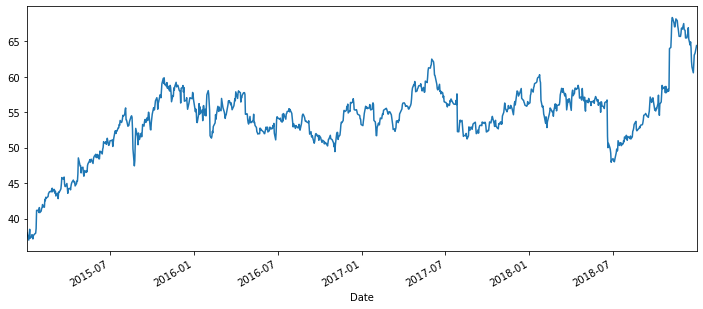

In [51]:
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

Now let's add in a rolling mean! This rolling method provides row entries, where every entry is then representative of the window.

In [52]:
# 7 day rolling mean
# The 7th record is mean of 7 rows previous to it including itself
df.rolling(window=7).mean().head(15)

Close        Volume
Date                               
2015-01-02        NaN           NaN
2015-01-05        NaN           NaN
2015-01-06        NaN           NaN
2015-01-07        NaN           NaN
2015-01-08        NaN           NaN
2015-01-09        NaN           NaN
2015-01-12  37.616786  1.238222e+07
2015-01-13  37.578786  1.297288e+07
2015-01-14  37.614786  1.264020e+07
2015-01-15  37.638114  1.270624e+07
2015-01-16  37.600114  1.260380e+07
2015-01-20  37.515786  1.225634e+07
2015-01-21  37.615786  9.868837e+06
2015-01-22  37.783114  1.185335e+07
2015-01-23  38.273129  1.571999e+07

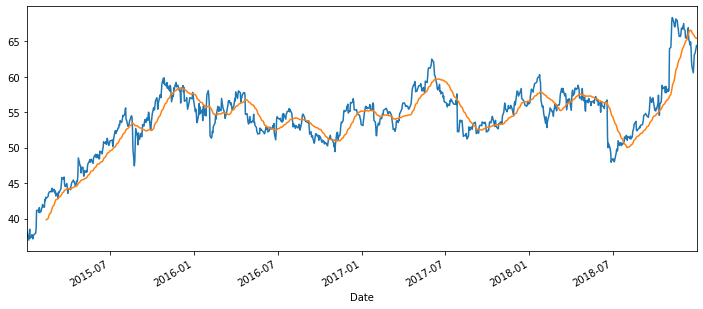

In [53]:
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df.rolling(window=30).mean()['Close'].plot();

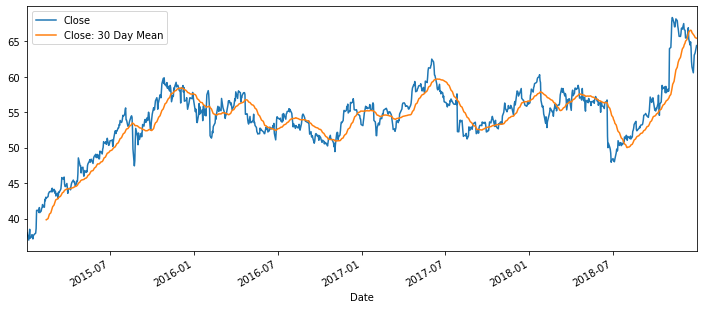

In [54]:
#add label
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

Observe the abscence of orange line for first 30 days

#### Expanding

Instead of calculating values for a rolling window of dates, what if you wanted to take into account everything from the start of the time series up to each point in time? For example, instead of considering the average over the last 7 days, we would consider all prior data in our expanding set of averages.

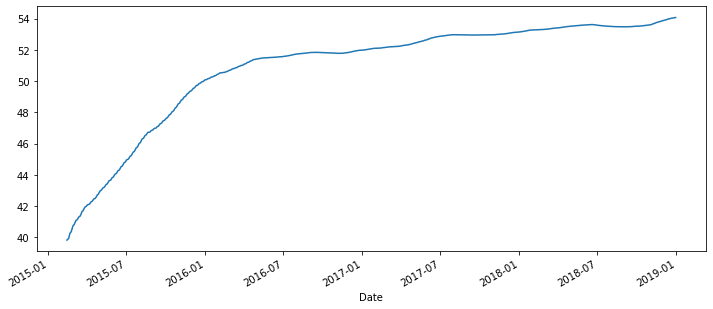

In [55]:
df['Close'].expanding(min_periods=30).mean().plot(figsize=(12,5));

#### Few Visualizations

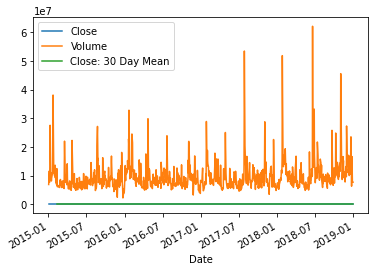

In [56]:
df.plot();

This isn't very helpful due to the difference in y-values, so we'll split them up.

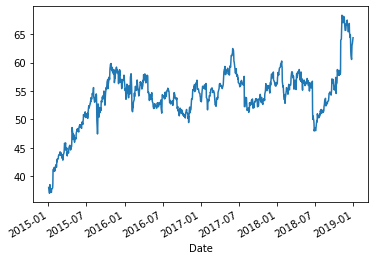

In [57]:
df['Close'].plot();

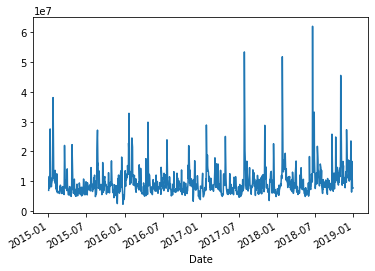

In [58]:
df['Volume'].plot();

#### Plot Formatting

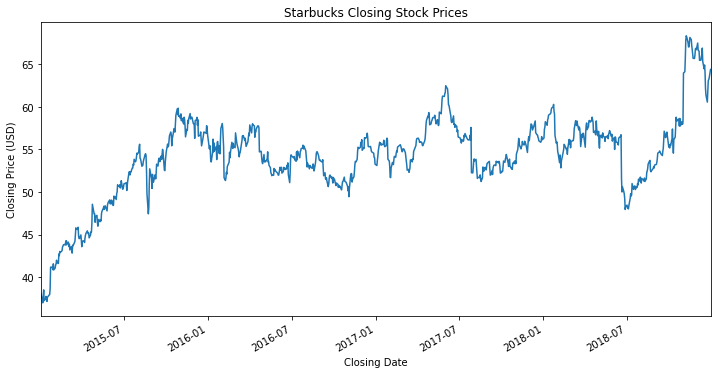

In [59]:
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

#### Axis Limits

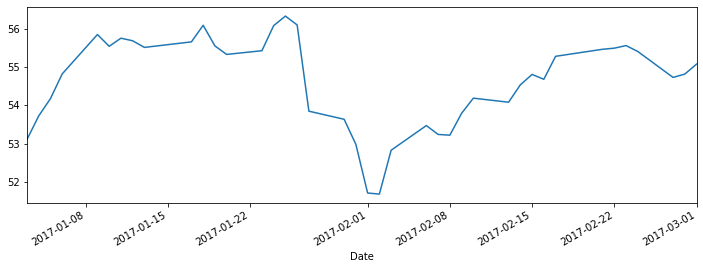

In [60]:
#Method-1
df['Close']['2017-01-01':'2017-03-01'].plot(figsize=(12,4)).autoscale(axis='x',tight=True);

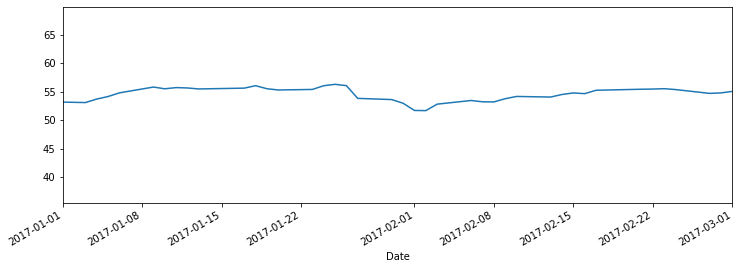

In [61]:
#Method-2
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01']);

In [62]:
# FIND THE MINIMUM VALUE IN THE RANGE:
df.loc['2017-01-01':'2017-03-01']['Close'].min()

51.6899

In [63]:
# FIND THE MAXIMUM VALUE IN THE RANGE:
df.loc['2017-01-01':'2017-03-01']['Close'].max()

56.3244

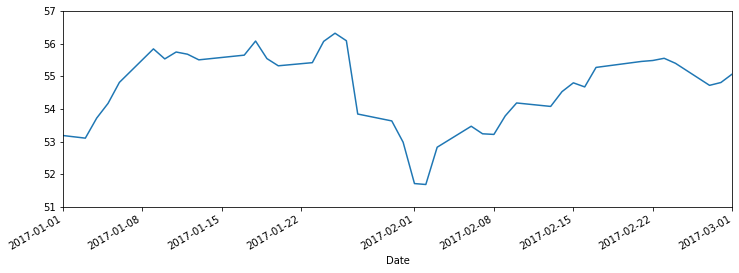

In [64]:
# PLUG THESE IN AS Y-LIMIT VALUES:
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01'],ylim=[51,57]);

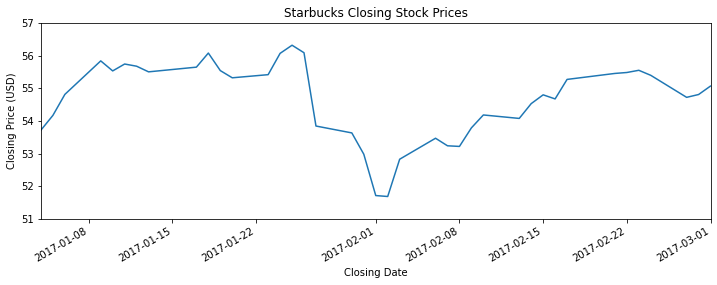

In [65]:
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(xlim=['2017-01-04','2017-03-01'],ylim=[51,57],figsize=(12,4),title=title)
ax.set(xlabel=xlabel, ylabel=ylabel);

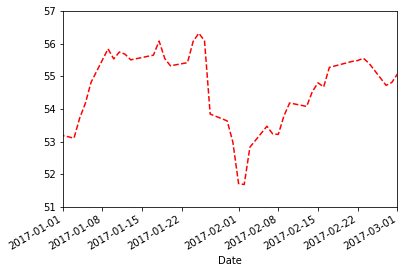

In [66]:
df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],ls='--',c='r');

#### Set the spacing

The x-axis values can be divided into major and minor axes.


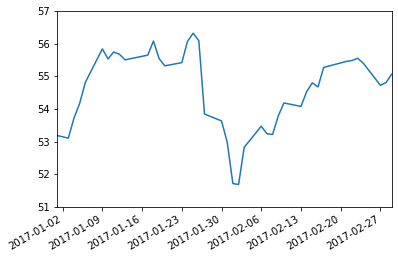

In [68]:
from matplotlib import dates
# CREATE OUR AXIS OBJECT
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57])

# REMOVE PANDAS DEFAULT "Date" LABEL
ax.set(xlabel='')

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

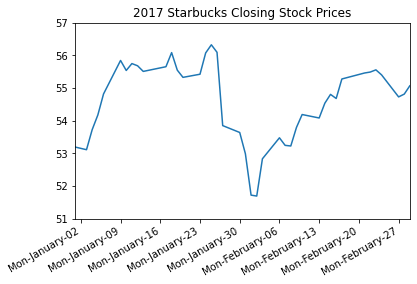

In [69]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter("%a-%B-%d"))

#### Major vs. Minor Axis Values

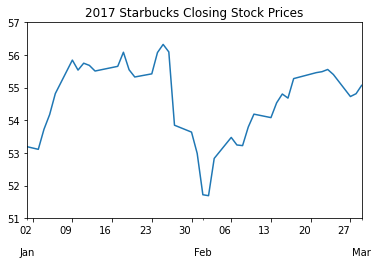

In [70]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],rot=0,title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

#### Grid lines

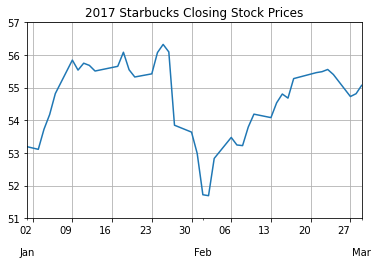

In [71]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],rot=0,title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.yaxis.grid(True)
ax.xaxis.grid(True)

#### Exercise1

In [72]:
df = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\monthly_milk_production.csv', encoding='utf8')
title = "Monthly milk production: pounds per cow. Jan '62 - Dec '75"

print(len(df))
print(df.head())

168
      Date  Production
0  1962-01         589
1  1962-02         561
2  1962-03         640
3  1962-04         656
4  1962-05         727


In [73]:
df.dtypes

Date          object
Production     int64
dtype: object

In [74]:
#Change the datatype
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Date          datetime64[ns]
Production             int64
dtype: object

In [75]:
df.set_index('Date',inplace=True)
df.head()

Production
Date                  
1962-01-01         589
1962-02-01         561
1962-03-01         640
1962-04-01         656
1962-05-01         727

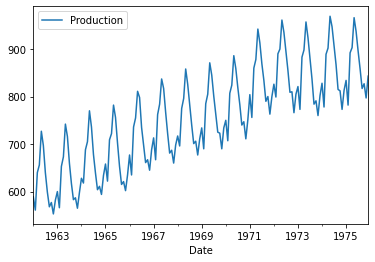

In [76]:
df.plot();

- There is seasonality
- It is upward trend

In [77]:
#Add month column
df['Month']=df.index.month
df.head()

Production  Month
Date                         
1962-01-01         589      1
1962-02-01         561      2
1962-03-01         640      3
1962-04-01         656      4
1962-05-01         727      5

In [78]:
#Month name
df['Month']=df.index.strftime('%B')
df.head()

Production     Month
Date                            
1962-01-01         589   January
1962-02-01         561  February
1962-03-01         640     March
1962-04-01         656     April
1962-05-01         727       May

In [80]:
df.shape

(168, 2)

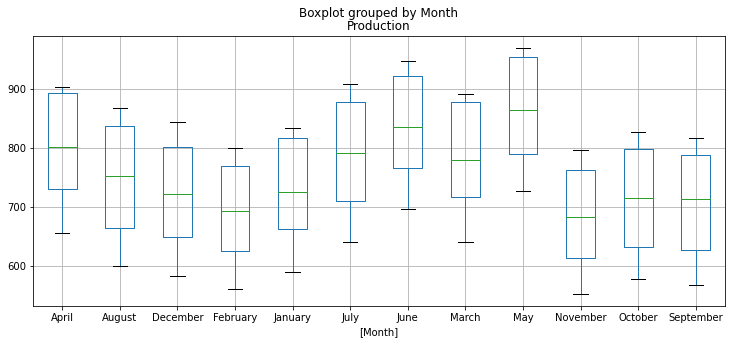

In [79]:
df.boxplot(by='Month',figsize=(12,5));

#### Exercise 2

In [81]:
df = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\UMTMVS.csv')

In [82]:
df.head()

DATE    UMTMVS
0  1992-01-01  209438.0
1  1992-02-01  232679.0
2  1992-03-01  249673.0
3  1992-04-01  239666.0
4  1992-05-01  243231.0

In [83]:
df.shape

(325, 2)

In [84]:
df.dtypes

DATE       object
UMTMVS    float64
dtype: object

In [85]:
df = df.set_index('DATE')

In [86]:
df.index

Index(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01', '1992-05-01',
       '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01', '1992-10-01',
       ...
       '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
      dtype='object', name='DATE', length=325)

In [87]:
df.index = pd.to_datetime(df.index)

In [88]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

<AxesSubplot:xlabel='DATE'>

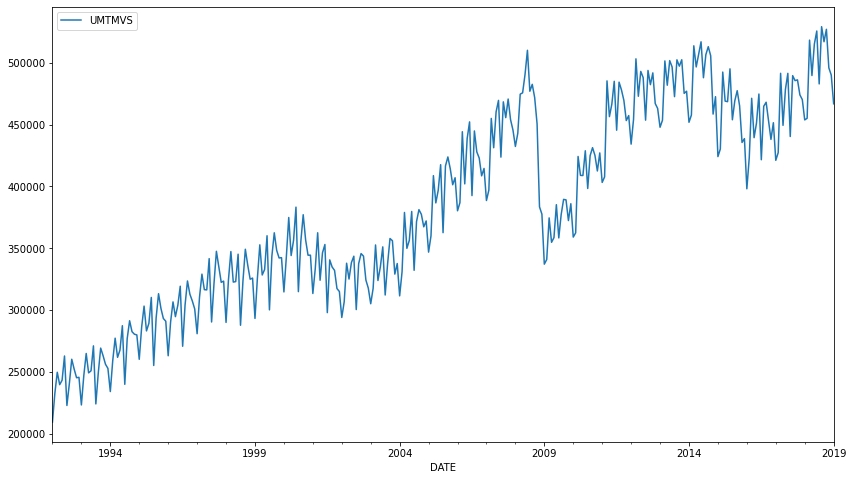

In [89]:
df.plot(figsize=(14,8))

#### What was the percent increase in value from Jan 2009 to Jan 2019?

In [90]:
100 * (df.loc['2019-01-01'] - df.loc['2009-01-01']) / df.loc['2009-01-01']

UMTMVS    38.472149
dtype: float64

#### What was the percent decrease from Jan 2008 to Jan 2009?

In [91]:
100 * (df.loc['2009-01-01'] - df.loc['2008-01-01']) / df.loc['2008-01-01']

UMTMVS   -22.022775
dtype: float64

#### What is the month with the least value after 2005?

In [92]:
df.loc['2005-01-01':].idxmin()

UMTMVS   2009-01-01
dtype: datetime64[ns]

#### What 6 months have the highest value?

In [93]:
df.sort_values(by='UMTMVS',ascending=False).head(5)

UMTMVS
DATE                
2018-08-01  529157.0
2018-10-01  527031.0
2018-06-01  525660.0
2018-03-01  518285.0
2018-09-01  516992.0

#### What was the value difference between Jan 2008 and Jan 2009?

In [94]:
df.loc['2008-01-01'] - df.loc['2009-01-01']

UMTMVS    95206.0
dtype: float64

#### What is the average value in millions of dollars per year?

<AxesSubplot:xlabel='DATE'>

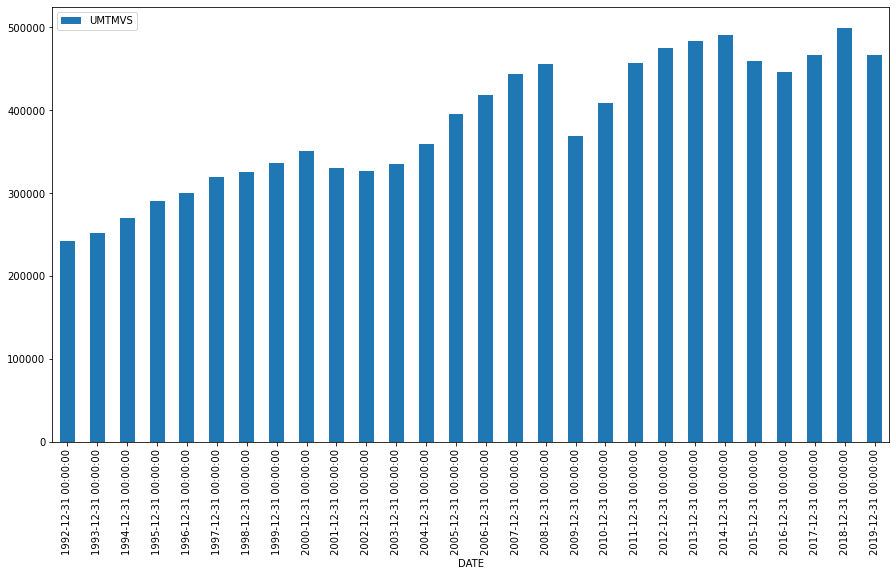

In [95]:
df.resample('Y').mean().plot.bar(figsize=(15,8))

#### What year had the biggest increase in mean value from the previous year's mean value? 

In [96]:
yearly_data = df.resample('Y').mean()
yearly_data_shift = yearly_data.shift(1)#forward shift

In [97]:
yearly_data.head()

UMTMVS
DATE                     
1992-12-31  242002.000000
1993-12-31  251708.083333
1994-12-31  269842.666667
1995-12-31  289973.083333
1996-12-31  299765.666667

In [98]:
change = yearly_data - yearly_data_shift 

In [100]:
change['UMTMVS'].idxmax()

Timestamp('2011-12-31 00:00:00', freq='A-DEC')

#### Plot out the yearly rolling mean on top of the original data. Monthly

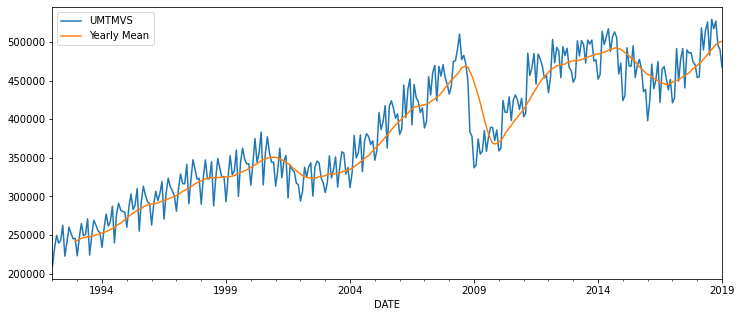

In [101]:
df['Yearly Mean'] = df['UMTMVS'].rolling(window=12).mean()
df[['UMTMVS','Yearly Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

#### Some month in 2008 the value peaked for that year. How many months did it take to surpass that 2008 peak?

In [102]:
df = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\UMTMVS.csv')

In [103]:
df.head()

DATE    UMTMVS
0  1992-01-01  209438.0
1  1992-02-01  232679.0
2  1992-03-01  249673.0
3  1992-04-01  239666.0
4  1992-05-01  243231.0

In [106]:
df = df.set_index('DATE')
df.index = pd.to_datetime(df.index)

In [107]:
df2008 = df.loc['2008-01-01':'2009-01-01']

In [108]:
df2008.idxmax()

UMTMVS   2008-06-01
dtype: datetime64[ns]

In [109]:
df_post_peak = df.loc['2008-06-01':]

In [110]:
df_post_peak[df_post_peak>=510081].dropna()

UMTMVS
DATE                
2008-06-01  510081.0
2014-03-01  513700.0
2014-06-01  516935.0
2014-09-01  512988.0
2018-03-01  518285.0
2018-05-01  515105.0
2018-06-01  525660.0
2018-08-01  529157.0
2018-09-01  516992.0
2018-10-01  527031.0

In [111]:
len(df.loc['2008-06-01':'2014-03-01'])

70

It took 70 months to reach back to that level!!

### Simple Case Study 2

#### Time Series Analysis using StatsModels

Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. The online documentation is hosted at <a href='https://www.statsmodels.org/stable/index.html'>statsmodels.org</a>

In [112]:
import numpy as np
import pandas as pd
%matplotlib inline

In [113]:
df = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\macrodata.csv',index_col=0,parse_dates=True)
df.head()

year  quarter   realgdp  realcons  realinv  realgovt  realdpi  \
1959-03-31  1959        1  2710.349    1707.4  286.898   470.045   1886.9   
1959-06-30  1959        2  2778.801    1733.7  310.859   481.301   1919.7   
1959-09-30  1959        3  2775.488    1751.8  289.226   491.260   1916.4   
1959-12-31  1959        4  2785.204    1753.7  299.356   484.052   1931.3   
1960-03-31  1960        1  2847.699    1770.5  331.722   462.199   1955.5   

              cpi     m1  tbilrate  unemp      pop  infl  realint  
1959-03-31  28.98  139.7      2.82    5.8  177.146  0.00     0.00  
1959-06-30  29.15  141.7      3.08    5.1  177.830  2.34     0.74  
1959-09-30  29.35  140.5      3.82    5.3  178.657  2.74     1.09  
1959-12-31  29.37  140.0      4.33    5.6  179.386  0.27     4.06  
1960-03-31  29.54  139.6      3.50    5.2  180.007  2.31     1.19

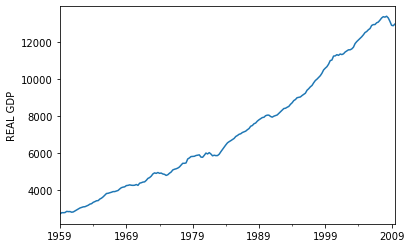

In [114]:
ax = df['realgdp'].plot()
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='REAL GDP');

#### Statsmodels to get the trend

- The Hodrick-Prescott filter separates a time-series 𝑦𝑡 into a trend component 𝜏𝑡 and a cyclical component 𝑐𝑡
- $y_t = \tau_t + c_t$
The components are determined by minimizing the following quadratic loss function, where $\lambda$ is a smoothing parameter:

$\min_{\\{ \tau_{t}\\} }\sum_{t=1}^{T}c_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$

In [115]:
from statsmodels.tsa.filters.hp_filter import hpfilter
# Tuple unpacking
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [116]:
gdp_cycle

1959-03-31     39.511915
1959-06-30     80.088532
1959-09-30     48.875455
1959-12-31     30.591933
1960-03-31     64.882667
1960-06-30     23.040242
1960-09-30     -1.355312
1960-12-31    -67.462365
1961-03-31    -81.367438
1961-06-30    -60.167890
1961-09-30    -46.369224
1961-12-31    -20.695339
1962-03-31     -2.162153
1962-06-30     -4.718648
1962-09-30    -13.556457
1962-12-31    -44.369262
1963-03-31    -43.320274
1963-06-30    -44.546971
1963-09-30    -26.298758
1963-12-31    -44.261196
1964-03-31    -14.434412
1964-06-30    -20.266867
1964-09-30    -19.137001
1964-12-31    -54.824590
1965-03-31    -15.962445
1965-06-30    -13.740115
1965-09-30     13.254828
1965-12-31     56.030402
1966-03-31    103.074337
1966-06-30     72.175348
1966-09-30     54.629725
1966-12-31     44.070651
1967-03-31     37.490163
1967-06-30     -1.511244
1967-09-30     -9.093507
1967-12-31    -16.853619
1968-03-31     28.222110
1968-06-30     61.175906
1968-09-30     54.331354
1968-12-31     38.104804


In [117]:
type(gdp_cycle)

pandas.core.series.Series

In [118]:
df['trend'] = gdp_trend

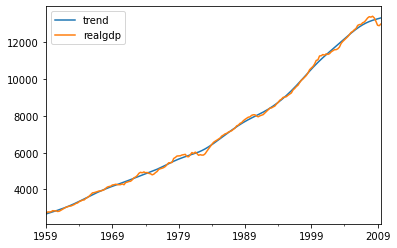

In [119]:
df[['trend','realgdp']].plot().autoscale(axis='x',tight=True);

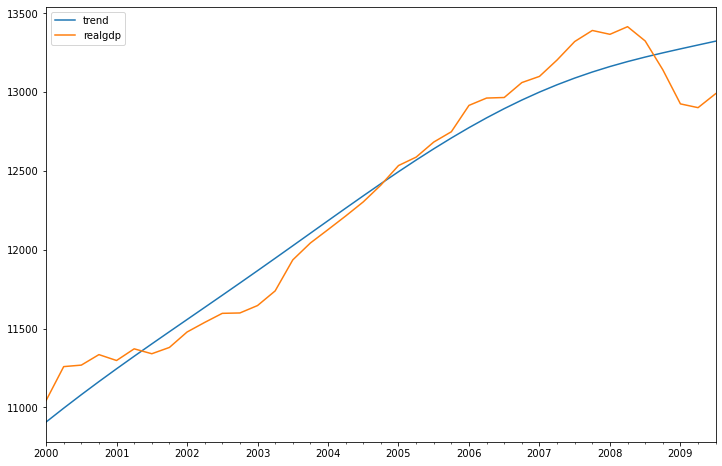

In [120]:
df[['trend','realgdp']]['2000-03-31':].plot(figsize=(12,8)).autoscale(axis='x',tight=True); 

#### ETS (Error Trend Seasonality)

- The decomposition of a time series attempts to isolate individual components such as error, trend, and seasonality (ETS)
- Statsmodels provides a seasonal decomposition tool we can use to separate out the different components. This lets us see quickly and visually what each component contributes to the overall behavior
- We apply an additive model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time
- A multiplicative model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers)

In [121]:
airline = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\airline_passengers.csv',index_col='Month',parse_dates=True)

In [122]:
airline.isnull().sum()

Thousands of Passengers    0
dtype: int64

In [123]:
airline.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

In [124]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

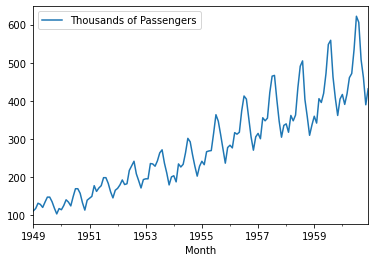

In [125]:
airline.plot();

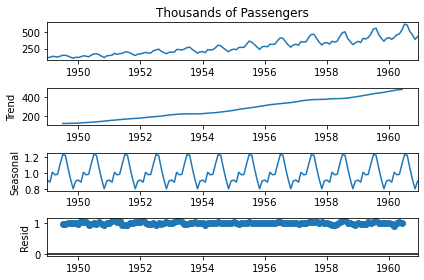

In [126]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(airline['Thousands of Passengers'], model='mul')
result.plot();

#### Moving Averages

#### Simple Moving Average

In [127]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [128]:
airline.head(15)

Thousands of Passengers  6-month-SMA  12-month-SMA
Month                                                         
1949-01-01                      112          NaN           NaN
1949-02-01                      118          NaN           NaN
1949-03-01                      132          NaN           NaN
1949-04-01                      129          NaN           NaN
1949-05-01                      121          NaN           NaN
1949-06-01                      135   124.500000           NaN
1949-07-01                      148   130.500000           NaN
1949-08-01                      148   135.500000           NaN
1949-09-01                      136   136.166667           NaN
1949-10-01                      119   134.500000           NaN
1949-11-01                      104   131.666667           NaN
1949-12-01                      118   128.833333    126.666667
1950-01-01                      115   123.333333    126.916667
1950-02-01                      126   119.666667    127.583333
1950-03-01                      141   120.500000    128.333333

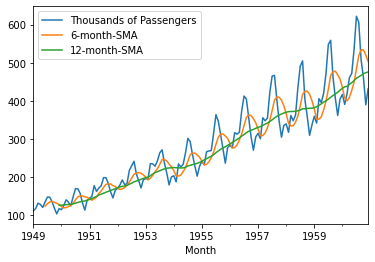

In [129]:
airline.plot();

#### Exponentially Weighted Moving Average (EWMA)

Cons of SMA:
- Smaller windows will lead to more noise, rather than signal
- It will always lag by the size of the window
- It will never reach to full peak or valley of the data due to the averaging
- Does not really inform you about possible future behavior, all it really does is describe trends in your data
- Extreme historical values can skew your SMA significantly

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size

The formula for EWMA is:
### $y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$

In [130]:
#Span corresponds to what is commonly called an “N-day EW moving average”.
#Alpha specifies the smoothing factor directly.
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12,adjust=False).mean() #SES(Simple Exponential Smoothing)

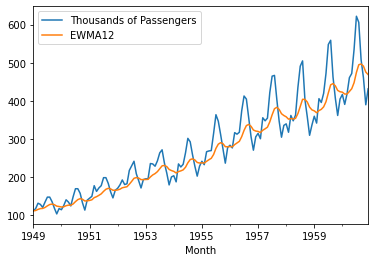

In [131]:
airline[['Thousands of Passengers','EWMA12']].plot();

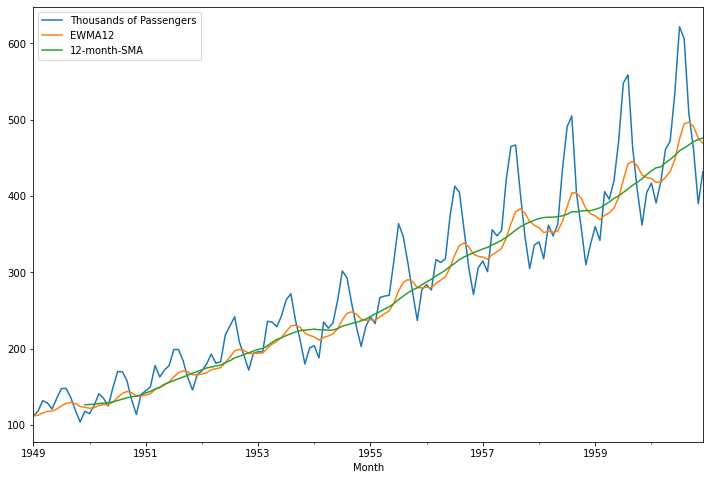

In [132]:
#SMA to EWMA
airline[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

The above example employed Simple Exponential Smoothing with one smoothing factor α. Unfortunately, this technique does a poor job of forecasting when there is a trend in the data as seen above.

#### Holt-Winters Methods

Simple Exponential Smoothing uses just one smoothing factor 𝛼(alpha). This failed to account for other contributing factors like trend and seasonality. 

In <strong>Double Exponential Smoothing</strong> (aka Holt's Method) we introduce a new smoothing factor $\beta$ (beta) that addresses trend:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
y_t &= l_t + b_t & \text{    fitted model}\\
\hat y_{t+h} &= l_t + hb_t & \text{    forecasting model (} h = \text{# periods into the future)}\end{split}

With <strong>Triple Exponential Smoothing</strong> (aka the Holt-Winters Method) we introduce a smoothing factor $\gamma$ (gamma) that addresses seasonality:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
c_t &= (1-\gamma)c_{t-L} + \gamma(x_t-l_{t-1}-b_{t-1}) & \text{    seasonal}\\
y_t &= (l_t + b_t) c_t & \text{    fitted model}\\
\hat y_{t+m} &= (l_t + mb_t)c_{t-L+1+(m-1)modL} & \text{    forecasting model (} m = \text{# periods into the future)}\end{split}

Here $L$ represents the number of divisions per cycle. In our case looking at monthly data that displays a repeating pattern each year, we would use $L=12$.

In general, higher values for $\alpha$, $\beta$ and $\gamma$ (values closer to 1), place more emphasis on recent data.

In [139]:
df = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\airline_passengers.csv',index_col='Month',parse_dates=True)

Note that our DatetimeIndex does not have a frequency. In order to build a Holt-Winters smoothing model, statsmodels needs to know the frequency of the data (whether it's daily, monthly etc.). Since observations occur at the start of each month, we'll use MS.

In [140]:
df.index.freq = 'MS'

df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [141]:
df.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

#### Simple Exponential Smoothing

$\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

In [142]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1) #if span is 12 then this is alpha equation

df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()
df['SES12'] = SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()

C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


Thousands of Passengers      EWMA12       SES12
Month                                                      
1949-01-01                      112  112.000000  112.000000
1949-02-01                      118  112.923077  112.923077
1949-03-01                      132  115.857988  115.857988
1949-04-01                      129  117.879836  117.879836
1949-05-01                      121  118.359861  118.359861

#### Double Exponential Smoothing

Where Simple Exponential Smoothing employs just one smoothing factor  𝛼  (alpha), Double Exponential Smoothing adds a second smoothing factor  𝛽  (beta) that addresses trends in the data. Like the alpha factor, values for the beta factor fall between zero and one ( 0<𝛽≤1 ). The benefit here is that the model can anticipate future increases or decreases where the level model would only work from recent calculations.

We can also address different types of change (growth/decay) in the trend. If a time series displays a straight-line sloped trend, you would use an additive adjustment. If the time series displays an exponential (curved) trend, you would use a multiplicative adjustment.

In [143]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
df.head()

C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


Thousands of Passengers      EWMA12       SES12    DESadd12
Month                                                                  
1949-01-01                      112  112.000000  112.000000  113.474828
1949-02-01                      118  112.923077  112.923077  119.464366
1949-03-01                      132  115.857988  115.857988  133.477561
1949-04-01                      129  117.879836  117.879836  130.543312
1949-05-01                      121  118.359861  118.359861  122.528126

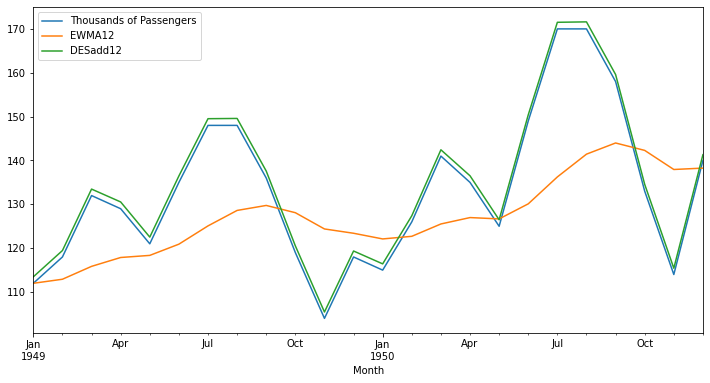

In [144]:
df[['Thousands of Passengers','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Here we can see that Double Exponential Smoothing is a much better representation of the time series data.<br>
Let's see if using a multiplicative seasonal adjustment helps.

In [145]:
df['DESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


Thousands of Passengers      EWMA12       SES12    DESadd12  \
Month                                                                     
1949-01-01                      112  112.000000  112.000000  113.474828   
1949-02-01                      118  112.923077  112.923077  119.464366   
1949-03-01                      132  115.857988  115.857988  133.477561   
1949-04-01                      129  117.879836  117.879836  130.543312   
1949-05-01                      121  118.359861  118.359861  122.528126   

              DESmul12  
Month                   
1949-01-01  114.978251  
1949-02-01  121.191659  
1949-03-01  135.802180  
1949-04-01  132.657709  
1949-05-01  124.213566

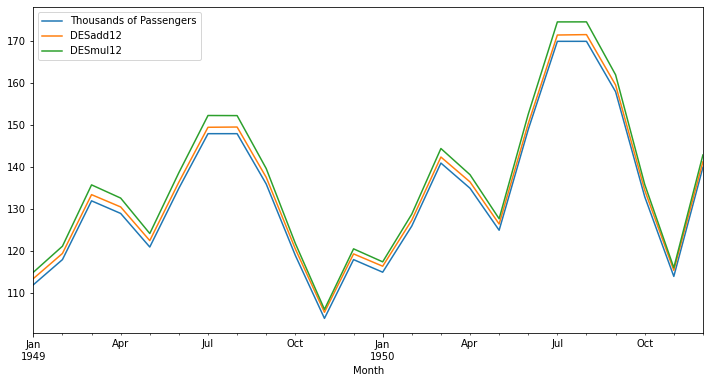

In [146]:
df[['Thousands of Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Although minor, it does appear that a multiplicative adjustment may give better results in recent run but additive works better.

#### Triple Exponential Smoothing

Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data.

In [147]:
df['TESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


Thousands of Passengers      EWMA12       SES12    DESadd12  \
Month                                                                     
1949-01-01                      112  112.000000  112.000000  113.474828   
1949-02-01                      118  112.923077  112.923077  119.464366   
1949-03-01                      132  115.857988  115.857988  133.477561   
1949-04-01                      129  117.879836  117.879836  130.543312   
1949-05-01                      121  118.359861  118.359861  122.528126   

              DESmul12    TESadd12  
Month                               
1949-01-01  114.978251  111.992548  
1949-02-01  121.191659  120.167745  
1949-03-01  135.802180  134.703417  
1949-04-01  132.657709  131.383768  
1949-05-01  124.213566  124.638396

In [148]:
df['TESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Thousands of Passengers      EWMA12       SES12    DESadd12  \
Month                                                                     
1949-01-01                      112  112.000000  112.000000  113.474828   
1949-02-01                      118  112.923077  112.923077  119.464366   
1949-03-01                      132  115.857988  115.857988  133.477561   
1949-04-01                      129  117.879836  117.879836  130.543312   
1949-05-01                      121  118.359861  118.359861  122.528126   

              DESmul12    TESadd12    TESmul12  
Month                                           
1949-01-01  114.978251  111.992548  111.597879  
1949-02-01  121.191659  120.167745  118.844235  
1949-03-01  135.802180  134.703417  133.334951  
1949-04-01  132.657709  131.383768  127.901291  
1949-05-01  124.213566  124.638396  120.978657

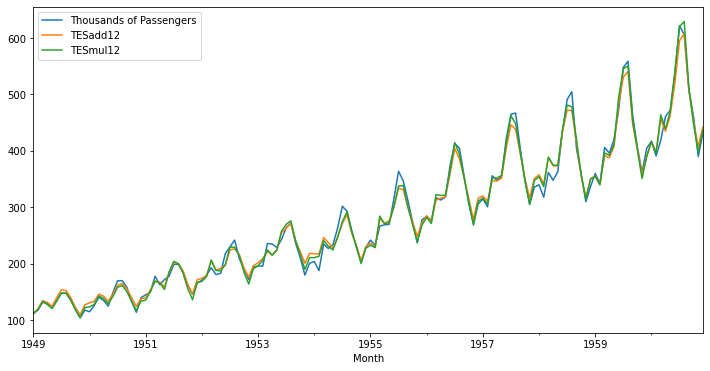

In [149]:
df[['Thousands of Passengers','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

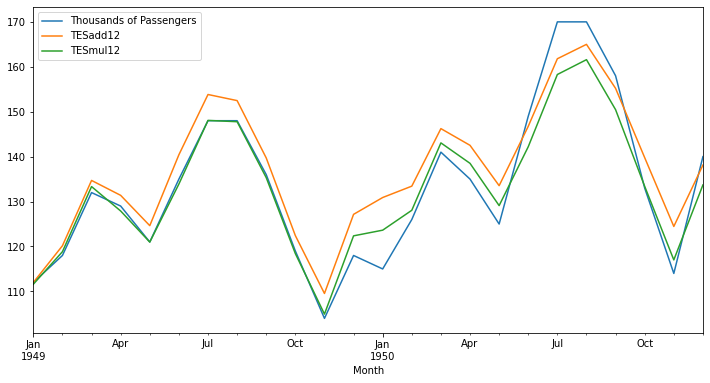

In [150]:
df[['Thousands of Passengers','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Based on the plot above, you might think that Triple Exponential Smoothing does a poorer job of fitting than Double Exponential Smoothing. The key here is to consider what comes next - <em>forecasting</em>.Sometimes the ability to predict fluctuating seasonal patterns greatly improves our forecast. In terms of ML less overfit the date to predict much better for future data points 

#### Exercise 2

In [151]:
df = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\EnergyProduction.csv',index_col=0,parse_dates=True)
df.head()

EnergyIndex
DATE                   
1970-01-01      43.0869
1970-02-01      42.5577
1970-03-01      41.6215
1970-04-01      40.1982
1970-05-01      39.9321

In [152]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

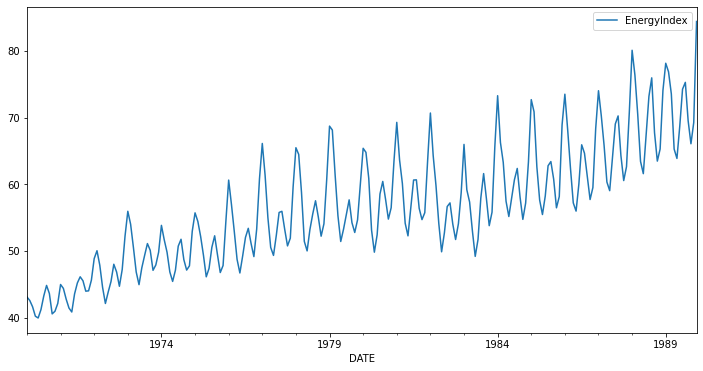

In [155]:
df.plot(figsize=(12,6)).autoscale(axis='x',tight=True);

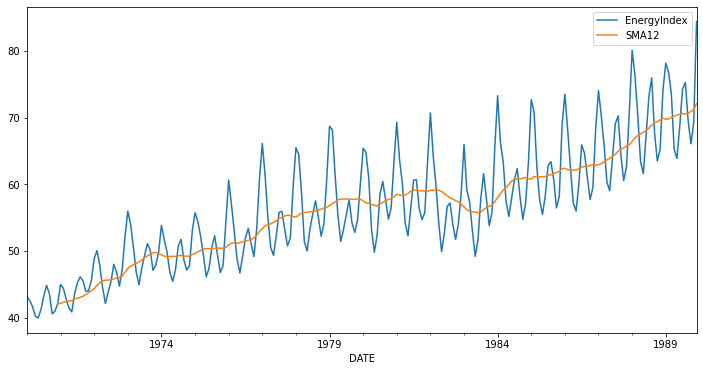

In [156]:
#Add a column that shows a 12-month Simple Moving Average (SMA)
df['SMA12'] = df['EnergyIndex'].rolling(window=12).mean()
df.plot(figsize=(12,6)).autoscale(axis='x',tight=True);

##### Add a column that shows an Exponentially Weighted Moving Average (EWMA) with a span of 12 using the statsmodels SimpleExpSmoothing function

C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


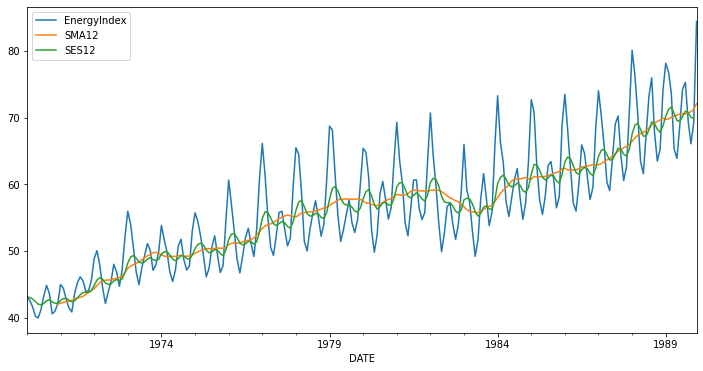

In [157]:
df['SES12'] = SimpleExpSmoothing(df['EnergyIndex']).fit(smoothing_level=2/(12+1),optimized=False).fittedvalues.shift(-1)
df.plot(figsize=(12,6)).autoscale(axis='x',tight=True);

#### Add a column to the DataFrame that shows a Holt-Winters fitted model using Triple Exponential Smoothing with multiplicative models. Plot the result

C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


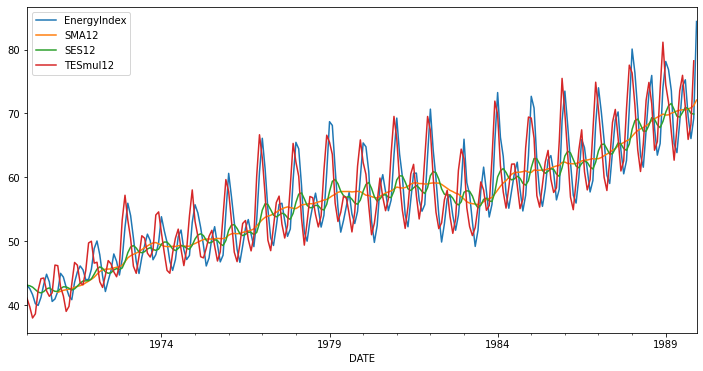

In [158]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['TESmul12'] = ExponentialSmoothing(df['EnergyIndex'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(-1)
df.plot(figsize=(12,6)).autoscale(axis='x',tight=True);

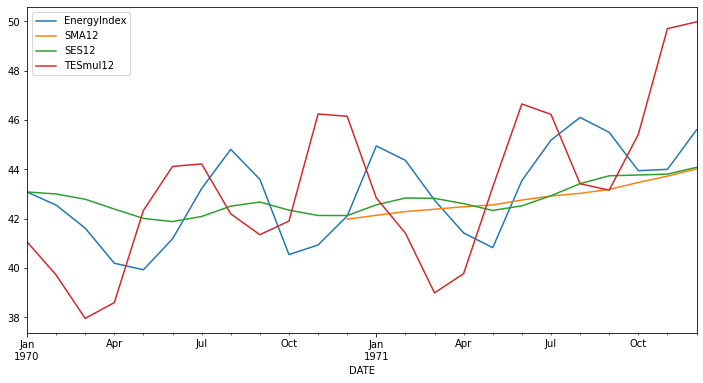

In [159]:
#For 2 years
df.iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

### Time Series Forecasting
#### Forecasting with the Holt-Winters Method

In [160]:
df = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

In [161]:
df.tail()

Thousands of Passengers
Month                              
1960-08-01                      606
1960-09-01                      508
1960-10-01                      461
1960-11-01                      390
1960-12-01                      432

In [162]:
df.shape

(144, 1)

Lets split the data into train and test to predict the quality of forecast

In [166]:
#train-test-split
train_data = df.iloc[:109] 
test_data = df.iloc[108:]

In [167]:
#Lets use TripleExplonentialSmoothing as it considers both the trend and the seasonality
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(36).rename('HW Forecast') #Forecast for 3 years(12x3=36)
test_predictions

C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


1958-02-01    339.143032
1958-03-01    399.281896
1958-04-01    394.233997
1958-05-01    402.545543
1958-06-01    473.128522
1958-07-01    521.795005
1958-08-01    514.512937
1958-09-01    446.216497
1958-10-01    385.430919
1958-11-01    339.645080
1958-12-01    381.455910
1959-01-01    401.210107
1959-02-01    387.159306
1959-03-01    455.812702
1959-04-01    450.050116
1959-05-01    459.538420
1959-06-01    540.114621
1959-07-01    595.671363
1959-08-01    587.358291
1959-09-01    509.392359
1959-10-01    440.000688
1959-11-01    387.732435
1959-12-01    435.462892
1960-01-01    458.013911
1960-02-01    441.973782
1960-03-01    520.347207
1960-04-01    513.768747
1960-05-01    524.600416
1960-06-01    616.584692
1960-07-01    680.007224
1960-08-01    670.517177
1960-09-01    581.512736
1960-10-01    502.296509
1960-11-01    442.628055
1960-12-01    497.116246
1961-01-01    522.860066
Freq: MS, Name: HW Forecast, dtype: float64

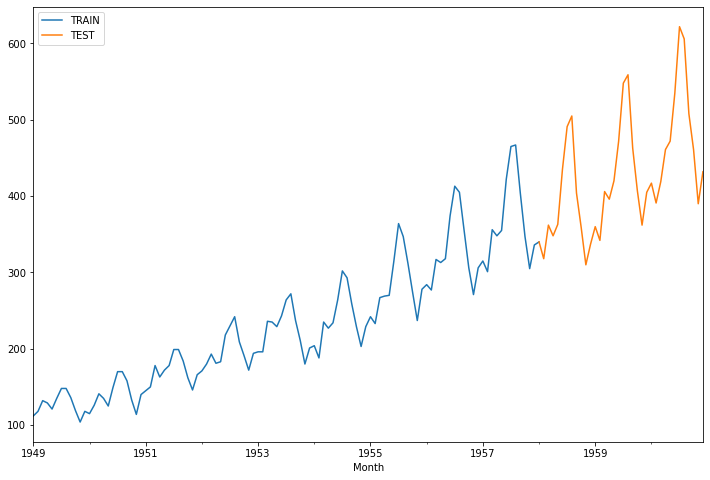

In [168]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

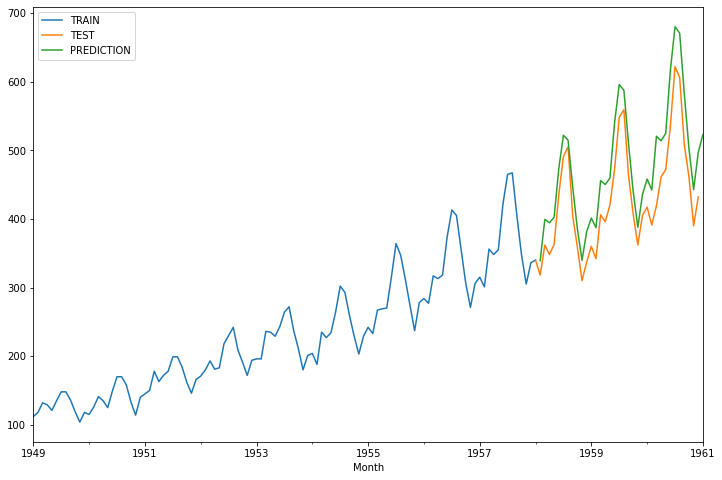

In [169]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

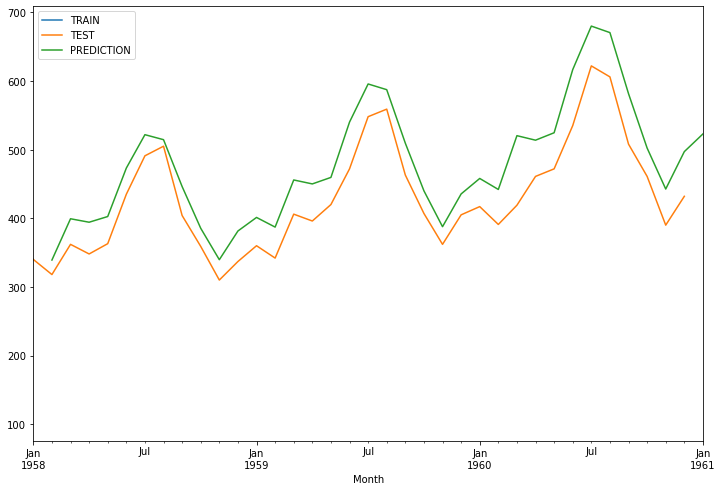

In [170]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01']);

#### Evaluation Metrics

In [171]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [172]:
mean_absolute_error(test_data,test_predictions)

63.031188493774

In [173]:
mean_squared_error(test_data,test_predictions)

5614.265289857208

In [174]:
np.sqrt(mean_squared_error(test_data,test_predictions))

74.92840108968834

- mae 63 is within the std of the distribution
- rmse 75 is within the std of the distribution

In [175]:
test_data.describe()

Thousands of Passengers
count                36.000000
mean                428.500000
std                  79.329152
min                 310.000000
25%                 362.000000
50%                 412.000000
75%                 472.000000
max                 622.000000

Lets combine the whole data and fit the model and forecast for 36 months

In [176]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [177]:
forecast_predictions = final_model.forecast(36)

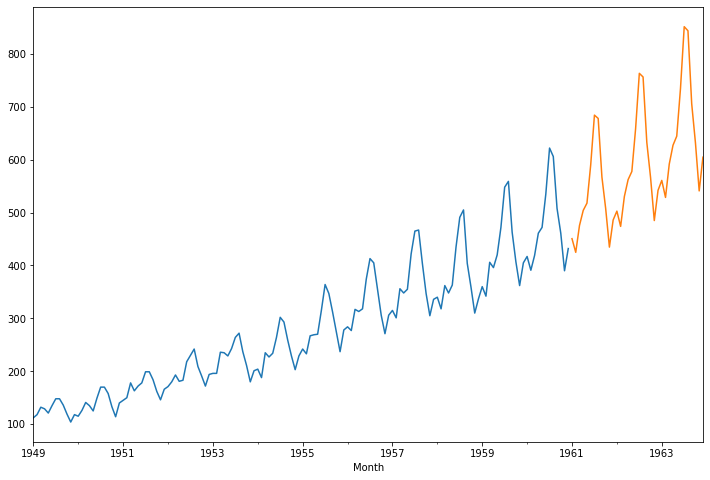

In [178]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot();

#### Stationarity

Time series data is said to be stationary if it does not exhibit trends or seasonality. That is, the mean, variance and covariance should be the same for any segment of the series, and are not functions of time.

In [179]:
df2 = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\samples.csv',index_col=0,parse_dates=True)
df2.head()

a   b  c   d
1950-01-01  36  27  0  67
1950-02-01  58  22  3  31
1950-03-01  61  17  5  67
1950-04-01  37  15  8  47
1950-05-01  66  13  8  62

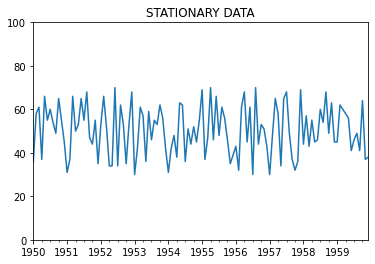

In [180]:
df2['a'].plot(ylim=[0,100],title="STATIONARY DATA").autoscale(axis='x',tight=True);

- No trend
- No Seasonality

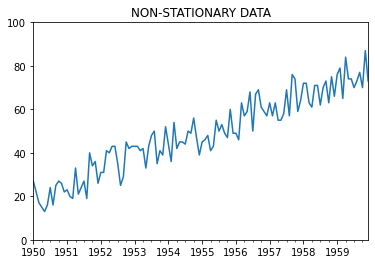

In [181]:
df2['b'].plot(ylim=[0,100],title="NON-STATIONARY DATA").autoscale(axis='x',tight=True);

- Trend is there
- No Seasonality

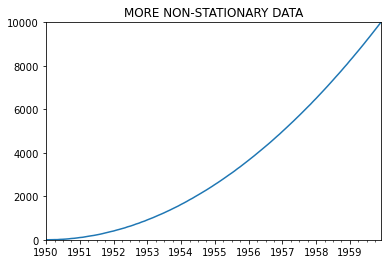

In [182]:
df2['c'].plot(ylim=[0,10000],title="MORE NON-STATIONARY DATA").autoscale(axis='x',tight=True);

#### Differencing

Non-stationary data can be made to look stationary through <em>differencing</em>. A simple method called <em>first order differencing</em> calculates the difference between consecutive observations.

&nbsp;&nbsp;&nbsp;&nbsp;$y^{\prime}_t = y_t - y_{t-1}$

In this way a linear trend is transformed into a horizontal set of values.

In [183]:
# Calculate the first difference of the non-stationary dataset "b"
df2['d1b'] = df2['b'] - df2['b'].shift(1)

df2[['b','d1b']].head()

b  d1b
1950-01-01  27  NaN
1950-02-01  22 -5.0
1950-03-01  17 -5.0
1950-04-01  15 -2.0
1950-05-01  13 -2.0

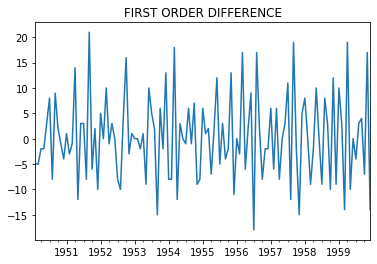

In [184]:
df2['d1b'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);

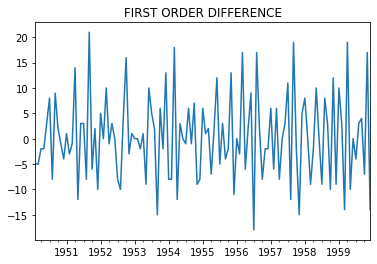

In [185]:
#An easier way to perform differencing on a pandas Series or DataFrame is to use the built-in .diff() method
#Non-stationary data is converted to stationary data using the first order difference
#Stationary data is expected to have constant mean and variance and it should not be function of time

df2['d1b'] = df2['b'].diff()

df2['d1b'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);

#### Forecasting on first order differenced data

When forecasting with first order differences, the predicted values have to be added back in to the original values in order to obtain an appropriate forecast.

Let's say that the next five forecasted values after applying some model to <tt>df['d1b']</tt> are <tt>[7,-2,5,-1,12]</tt>. We need to perform an <em>inverse transformation</em> to obtain values in the scale of the original time series.

In [186]:
df2[['b']].tail(3)

b
1959-10-01  70
1959-11-01  87
1959-12-01  73

In [187]:
# Next set a DateTime index for the forecast set that extends 5 periods into the future
idx = pd.date_range('1960-01-01', periods=5, freq='MS')
z = pd.DataFrame([7,-2,5,-1,12],index=idx,columns=['Fcast'])
z

Fcast
1960-01-01      7
1960-02-01     -2
1960-03-01      5
1960-04-01     -1
1960-05-01     12

The idea behind an inverse transformation is to start with the most recent value from the training set, and to add a cumulative sum of Fcast values to build the new forecast set. For this we'll use the pandas .cumsum() function which does the reverse of .diff()

In [188]:
z['forecast'] = df2['b'].iloc[-1] + z['Fcast'].cumsum()
z

Fcast  forecast
1960-01-01      7        80
1960-02-01     -2        78
1960-03-01      5        83
1960-04-01     -1        82
1960-05-01     12        94

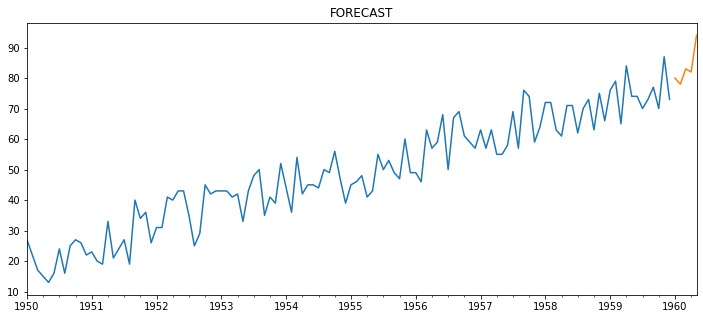

In [189]:
df2['b'].plot(figsize=(12,5), title="FORECAST").autoscale(axis='x',tight=True)

z['forecast'].plot();

#### Second order differencing
Sometimes the first difference is not enough to attain stationarity, particularly if the trend is not linear. We can difference the already differenced values again to obtain a second order set of values.

&nbsp;&nbsp;&nbsp;&nbsp;$\begin{split}y_{t}^{\prime\prime} &= y_{t}^{\prime} - y_{t-1}^{\prime} \\
&= (y_t - y_{t-1}) - (y_{t-1} - y_{t-2}) \\
&= y_t - 2y_{t-1} + y_{t-2}\end{split}$

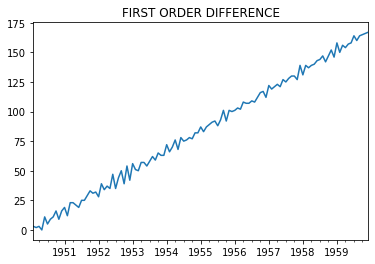

In [190]:
# First we'll look at the first order difference of dataset "c"
df2['d1c'] = df2['c'].diff()

df2['d1c'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);

Now let's apply a second order difference to dataset "c".

In [191]:
# We can do this from the original time series in one step
df2['d2c'] = df2['c'].diff().diff()

df2[['c','d1c','d2c']].head()

c  d1c  d2c
1950-01-01  0  NaN  NaN
1950-02-01  3  3.0  NaN
1950-03-01  5  2.0 -1.0
1950-04-01  8  3.0  1.0
1950-05-01  8  0.0 -3.0

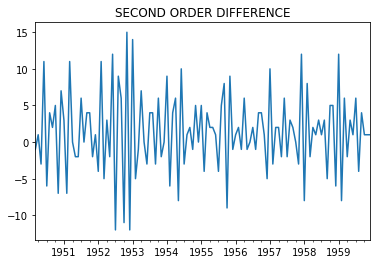

In [192]:
df2['d2c'].plot(title="SECOND ORDER DIFFERENCE").autoscale(axis='x',tight=True);

### Forecasting on second order differenced data
As before, the prediction values have to be added back in to obtain an appropriate forecast.

To invert the second order transformation and obtain forecasted values for $\hat y_t$ we have to solve the second order equation for $y_t$:

&nbsp;&nbsp;&nbsp;&nbsp;$\begin{split}y_{t}^{\prime\prime} &= y_t - 2y_{t-1} + y_{t-2} \\
y_t &= y_{t}^{\prime\prime} + 2y_{t-1} - y_{t-2}\end{split}$

Let's say that the next five forecasted values after applying some model to <tt>df['d2c']</tt> are <tt>[7,-2,5,-1,12]</tt>.

In [193]:
# For our example we need to build a forecast series from scratch
idx = pd.date_range('1960-01-01', periods=5, freq='MS')
z = pd.DataFrame([7,-2,5,-1,12],index=idx,columns=['Fcast'])
z    

Fcast
1960-01-01      7
1960-02-01     -2
1960-03-01      5
1960-04-01     -1
1960-05-01     12

In [194]:
#inverse transform second order difference
forecast = []

# Capture the two most recent values from the training set
v2,v1 = df2['c'].iloc[-2:]

# Apply the formula
for i in z['Fcast']:
    newval = i + 2*v1 - v2
    forecast.append(newval)
    v2,v1 = v1,newval

z['forecast']=forecast
z

Fcast  forecast
1960-01-01      7     10174
1960-02-01     -2     10346
1960-03-01      5     10523
1960-04-01     -1     10699
1960-05-01     12     10887

In [195]:
df2['c'].iloc[-1]

10000

In [196]:
(df2['c'].iloc[-1]-df2['c'].iloc[-2])

167

In [197]:
z['Fcast'].cumsum()

1960-01-01     7
1960-02-01     5
1960-03-01    10
1960-04-01     9
1960-05-01    21
Freq: MS, Name: Fcast, dtype: int64

Another, perhaps more straightforward method is to create a first difference set from the second, then build the forecast set from the first difference. We'll again use the pandas .cumsum() function which does the reverse of .diff()

In [198]:
# Add the most recent first difference from the training set to the Fcast cumulative sum
z['firstdiff'] = (df2['c'].iloc[-1]-df2['c'].iloc[-2]) + z['Fcast'].cumsum()

# Now build the forecast values from the first difference set
z['forecast'] = df2['c'].iloc[-1] + z['firstdiff'].cumsum()

z[['Fcast','firstdiff','forecast']]

Fcast  firstdiff  forecast
1960-01-01      7        174     10174
1960-02-01     -2        172     10346
1960-03-01      5        177     10523
1960-04-01     -1        176     10699
1960-05-01     12        188     10887

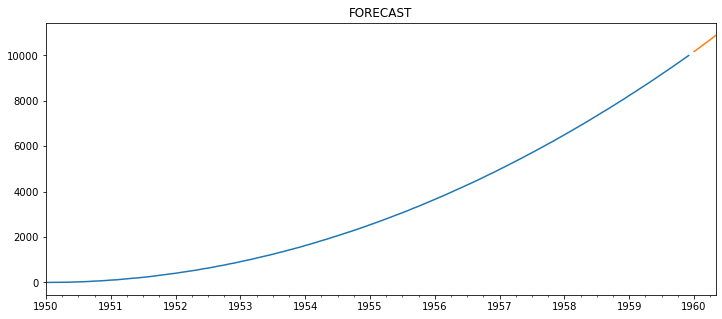

In [199]:
df2['c'].plot(figsize=(12,5), title="FORECAST").autoscale(axis='x',tight=True)

z['forecast'].plot();

#### Autocorrelation Function(ACF) / Partial Autocorrelation Function(PACF)

In [202]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

### Autocovariance Example:
Say we have a time series with five observations: {13, 5, 11, 12, 9}.<br>
We can quickly see that $n = 5$, the mean $\bar{y} = 10$, and we'll see that the variance $\sigma^2 = 8$.<br>
The following calculations give us our covariance values:
<br><br>
$\gamma_0 = \frac {(13-10)(13-10)+(5-10)(5-10)+(11-10)(11-10)+(12-10)(12-10)+(9-10)(9-10)} 5 = \frac {40} 5 = 8.0 \\
\gamma_1 = \frac {(13-10)(5-10)+(5-10)(11-10)+(11-10)(12-10)+(12-10)(9-10)} 5 = \frac {-20} 5 = -4.0 \\
\gamma_2 = \frac {(13-10)(11-10)+(5-10)(12-10)+(11-10)(9-10)} 5 = \frac {-8} 5 = -1.6 \\
\gamma_3 = \frac {(13-10)(12-10)+(5-10)(9-10)} 5 = \frac {11} 5 = 2.2 \\
\gamma_4 = \frac {(13-10)(9-10)} 5 = \frac {-3} 5 = -0.6$
<br><br>
Note that $\gamma_0$ is just the population variance $\sigma^2$

Let's see if statsmodels gives us the same results! For this we'll create a <strong>fake</strong> dataset:

In [203]:
df = pd.DataFrame({'a':[13, 5, 11, 12, 9]})
arr = acovf(df['a'])
arr

array([ 8. , -4. , -1.6,  2.2, -0.6])

#### Autocorrelation for 1D

When working with a single variable (i.e. autocorrelation) we would consider  𝑦1  to be the original series and  𝑦2  a lagged version of it. Note that with autocorrelation we work with  𝑦¯ , that is, the full population mean, and not the means of the reduced set of lagged factors 

In [204]:
arr3 = acf(df['a'])
arr3

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

#### Partial Autocorrelation
Partial autocorrelations measure the linear dependence of one variable after removing the effect of other variable(s) that affect both variables. That is, the partial autocorrelation at lag $k$ is the autocorrelation between $y_t$ and $y_{t+k}$ that is not accounted for by lags $1$ through $k−1$.

In [205]:
arr4 = pacf_yw(df['a'],nlags=4,method='mle')
arr4

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [201]:
# Load a non-stationary dataset
df1 = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a stationary dataset
df2 = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

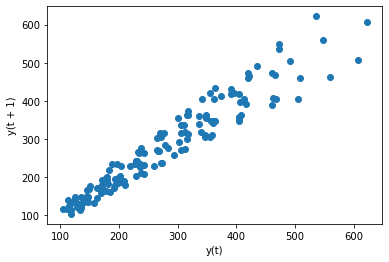

In [206]:
from pandas.plotting import lag_plot

lag_plot(df1['Thousands of Passengers']);

Visually this shows evidence of a very strong autocorrelation; as $y_t$ values increase, nearby (lagged) values also increase.

Now let's look at the stationary <strong>Daily Total Female Births</strong> dataset:

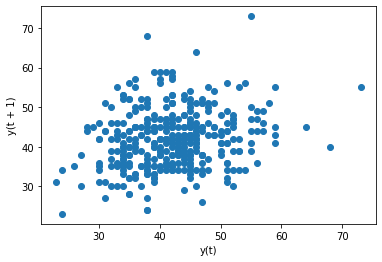

In [207]:
lag_plot(df2['Births']);

As expected, there is little evidence of autocorrelation here.

#### ACF Plots

Plotting the magnitude of the autocorrelations over the first few (20-40) lags can say a lot about a time series.
​
For example, consider the stationary <strong>Daily Total Female Births</strong> dataset:

In [208]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [209]:
# Let's look first at the ACF array. By default acf() returns 40 lags
acf(df2['Births'])

array([ 1.        ,  0.21724118,  0.15287758,  0.10821254,  0.09066059,
        0.09595481,  0.09104012,  0.19508071,  0.14115295,  0.06117859,
        0.04781522,  0.04770662, -0.01964707,  0.02287422,  0.08112657,
        0.11185686,  0.07333732,  0.01501845,  0.07270333,  0.06859   ,
        0.09280107,  0.26386846,  0.14012147,  0.06070286,  0.08716232,
        0.05038825,  0.0650489 ,  0.11466565,  0.1552232 ,  0.12850638,
        0.10358981,  0.09734643,  0.04912286,  0.04022798,  0.05838555,
        0.05359812,  0.10151053,  0.08268663,  0.0912185 ,  0.11192192,
        0.05652846])

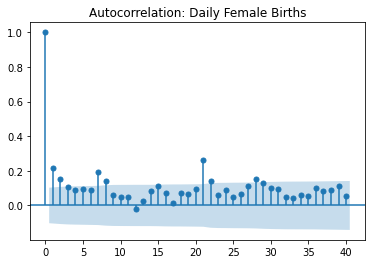

In [210]:
# Now let's plot the autocorrelation at different lags
title = 'Autocorrelation: Daily Female Births'
lags = 40
plot_acf(df2,title=title,lags=lags);

This is a typical ACF plot for stationary data, with lags on the horizontal axis and correlations on the vertical axis. The first value $y_0$ is always 1. A sharp dropoff indicates that there is no AR component in the ARIMA model.

Next we'll look at non-stationary data with the <strong>Airline Passengers</strong> dataset:

In [211]:
acf(df1['Thousands of Passengers'])

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092])

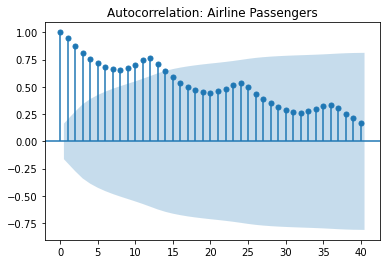

In [212]:
title = 'Autocorrelation: Airline Passengers'
lags = 40
plot_acf(df1,title=title,lags=lags);

This plot indicates non-stationary data, as there are a large number of lags before ACF values drop off.

The shaded area indicates the 95% confidense region. The points out of the region shows the confidense in the correlation. As the number of lags increases the plot becomes less confident

#### PACF Plots
Partial autocorrelations work best with stationary data. Let's look first at <strong>Daily Total Female Births</strong>:

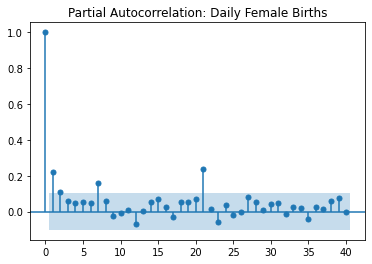

In [213]:
title='Partial Autocorrelation: Daily Female Births'
lags=40
plot_pacf(df2,title=title,lags=lags);

To make the Airline Passengers data stationary, we'll first apply differencing:

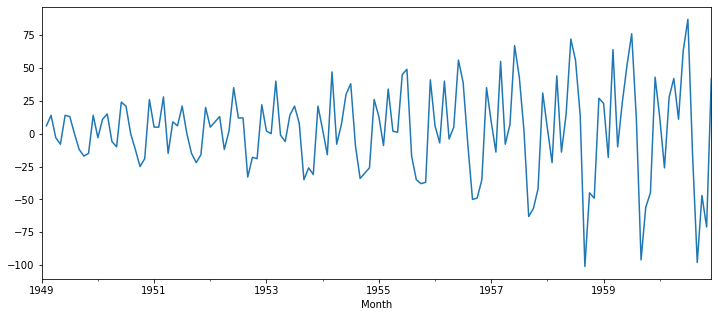

In [214]:
from statsmodels.tsa.statespace.tools import diff

df1['d1'] = diff(df1['Thousands of Passengers'],k_diff=1)
df1['d1'].plot(figsize=(12,5));

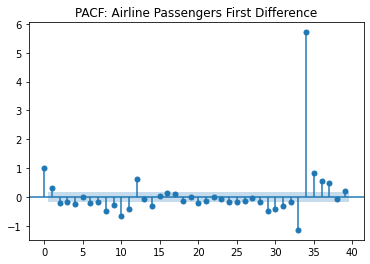

In [215]:
title='PACF: Airline Passengers First Difference'
lags=40
plot_pacf(df1['d1'].dropna(),title=title,lags=np.arange(lags));

In case you want to display the full autocorrelation plot, it helps to increase the figure size using matplotlib:

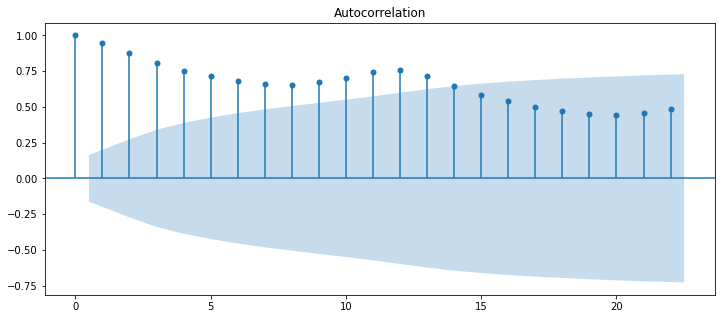

In [218]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,5))

plot_acf(df1['Thousands of Passengers'],ax=ax);

### Autoregressive Model (AR(p) )
In a moving average model as we saw with Holt-Winters, we forecast the variable of interest using a linear combination of predictors. In our example we forecasted numbers of airline passengers in thousands based on a set of level, trend and seasonal predictors.

In an autoregression model, we forecast using a linear combination of <em>past values</em> of the variable. The term <em>autoregression</em> describes a regression of the variable against itself. An autoregression is run against a set of <em>lagged values</em> of order $p$.

### $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.

For example, an <strong>AR(1)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

whereas an <strong>AR(2)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \varepsilon_{t}$

and so on.

Note that the lag coeffients are usually less than one, as we usually restrict autoregressive models to stationary data.<br>
Specifically, for an <strong>AR(1)</strong> model: $-1 \lt \phi_1 \lt 1$<br>
and for an <strong>AR(2)</strong> model: $-1 \lt \phi_2 \lt 1, \ \phi_1 + \phi_2 \lt 1, \ \phi_2 - \phi_1 \lt 1$<br>


### Simple Case Study 3

For this we'll look at monthly U.S. population estimates in thousands from January 2011 to December 2018 (96 records, 8 years of data).

In [219]:
from statsmodels.tsa.ar_model import AR,ARResults

# Load the U.S. Population dataset
df = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [220]:
df.head()

PopEst
DATE              
2011-01-01  311037
2011-02-01  311189
2011-03-01  311351
2011-04-01  311522
2011-05-01  311699

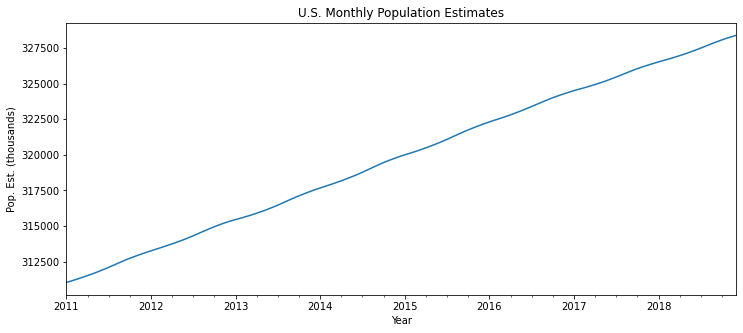

In [221]:
title='U.S. Monthly Population Estimates'
ylabel='Pop. Est. (thousands)'
xlabel='Year' 

ax = df['PopEst'].plot(figsize=(12,5),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

* Split known data into a training set of records on which to fit the model
* Use the remaining records for testing, to evaluate the model
* Fit the model again on the <em>full</em> set of records
* Predict a future set of values using the model

As a general rule you should set the length of your test set equal to your intended forecast size. That is, for a monthly dataset you might want to forecast out one more year. Therefore your test set should be one year long.

In [222]:
len(df)

96

In [223]:
len(df) - 12 #forecast for a year

84

In [224]:
train = df.iloc[:84]
test = df.iloc[84:]

In [225]:
model = AR(train['PopEst'])
AR1fit = model.fit(maxlag=1,method='mle')#maxlag is p
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

Lag: 1
Coefficients:
const        147.296808
L1.PopEst      0.999537
dtype: float64


In [226]:
start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [227]:
predictions1

2018-01-01    326374.208364
2018-02-01    326370.418482
2018-03-01    326366.630356
2018-04-01    326362.843982
2018-05-01    326359.059362
2018-06-01    326355.276494
2018-07-01    326351.495376
2018-08-01    326347.716010
2018-09-01    326343.938392
2018-10-01    326340.162524
2018-11-01    326336.388403
2018-12-01    326332.616030
Freq: MS, Name: AR(1) Predictions, dtype: float64

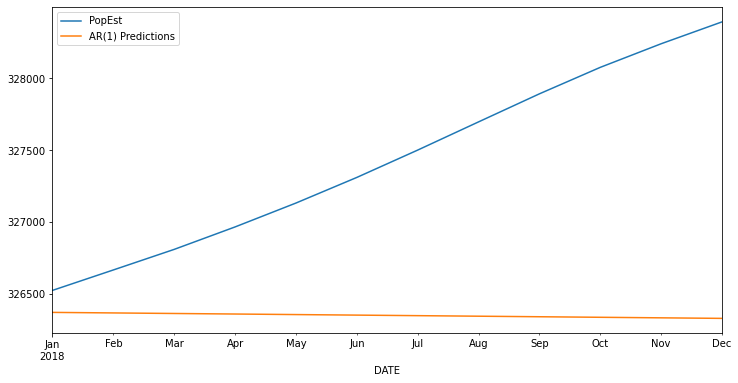

In [228]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

The lag(p)=1 doesnt predict good. Lets try with other p values

In [230]:
model2 = AR(train['PopEst'])
AR2fit = model2.fit(maxlag=2,method='mle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')

Lag: 2
Coefficients:
const        137.361529
L1.PopEst      1.996476
L2.PopEst     -0.996907
dtype: float64


In [231]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

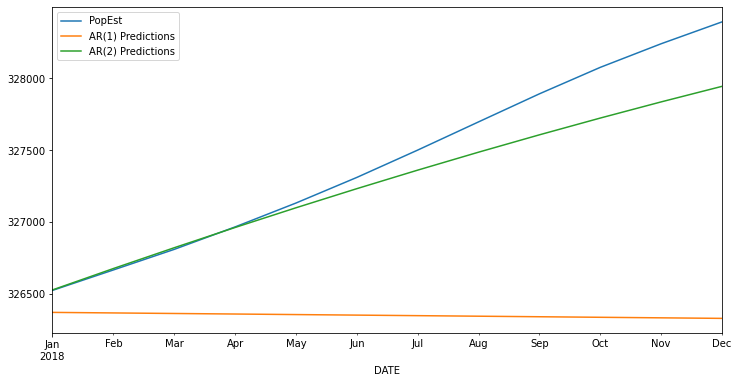

In [232]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));

#### Fit an AR(p) model where statsmodels chooses p
This time we'll omit the <tt>maxlag</tt> argument in <tt>AR.fit()</tt> and let statsmodels choose a p-value for us.

In [233]:
model3 = AR(train['PopEst'])
ARfit = model3.fit(method = 'cmle')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 11
Coefficients:
const         96.143523
L1.PopEst      2.298626
L2.PopEst     -2.027441
L3.PopEst      1.356878
L4.PopEst     -1.171630
L5.PopEst      0.816723
L6.PopEst     -0.699990
L7.PopEst      0.727004
L8.PopEst     -0.354790
L9.PopEst      0.241036
L10.PopEst    -0.179865
L11.PopEst    -0.006819
dtype: float64


In [234]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(11) Predictions'

predictions11 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

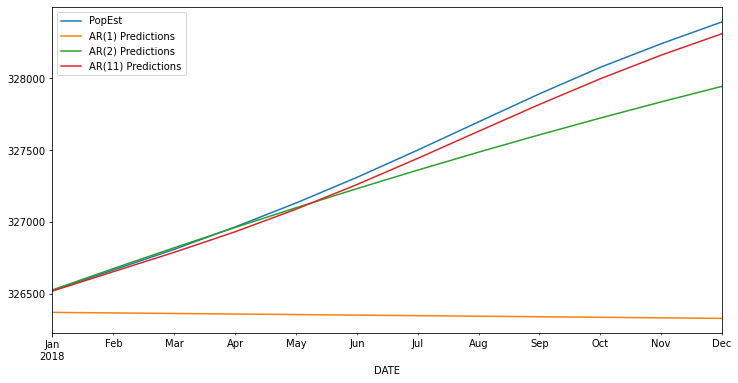

In [235]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions11.plot(legend=True,figsize=(12,6));

## Evaluate the Model
It helps to have a means of comparison between two or more models. One common method is to compute the Mean Squared Error (MSE), available from scikit-learn.

In [236]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(11)']
preds = [predictions1, predictions2, predictions11] 

for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 1552397.371
AR(2) Error: 53365.21485
AR(11) Error:  3206.17272


We see right away how well AR(11) outperformed the other two models.

Another method is the <a href='https://en.wikipedia.org/wiki/Akaike_information_criterion'>Akaike information criterion</a> (AIC), which does a better job of evaluating models by avoiding overfitting.<br>
Fortunately this is available directly from the fit model object.

In [237]:
modls = [AR1fit,AR2fit,ARfit]

for i in range(3):
    print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

AR(1) AIC: 10.534
AR(2) AIC: 5.1557
AR(11) AIC:  3.561


## Forecasting
Now we're ready to train our best model on the greatest amount of data, and fit it to future dates.

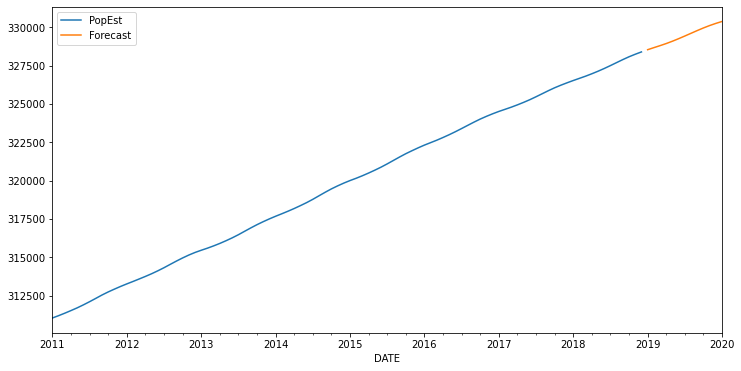

In [238]:
# First, retrain the model on the full dataset
model = AR(df['PopEst'])

# Next, fit the model
ARfit = model.fit(maxlag=11,method='mle')

# Make predictions
fcast = ARfit.predict(start=len(df), end=len(df)+12, dynamic=False).rename('Forecast')

# Plot the results
df['PopEst'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));

#### Descriptive Statistics and Tests

Lets see how to determine if a time series is <em>stationary</em>, if it's <em>independent</em>, and if two series demonstrate <em>correlation</em> and/or <em>causality</em>.

In [240]:
# Load a non-stationary dataset
df1 = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a stationary dataset
df2 = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [242]:
from statsmodels.tsa.stattools import ccovf,ccf
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin
from statsmodels.tools.eval_measures import mse, rmse, meanabs

#### Tests for Stationarity
A time series is <em>stationary</em> if the mean and variance are fixed between any two equidistant points. That is, no matter where you take your observations, the results should be the same. A times series that shows seasonality is <em>not</em> stationary.

A test for stationarity usually involves a <a href='https://en.wikipedia.org/wiki/Unit_root_test'>unit root</a> hypothesis test, where the null hypothesis $H_0$ is that the series is <em>nonstationary</em>, and contains a unit root. The alternate hypothesis $H_1$ supports stationarity. The <a href='https://en.wikipedia.org/wiki/Augmented_Dickey-Fuller_test'>augmented Dickey-Fuller</a> and <a href='https://en.wikipedia.org/wiki/KPSS_test'>Kwiatkowski-Phillips-Schmidt-Shin</a> tests are stationarity tests. 

#### Augmented Dickey-Fuller Test
To determine whether a series is stationary we can use the <a href='https://en.wikipedia.org/wiki/Augmented_Dickey-Fuller_test'>augmented Dickey-Fuller Test</a>. In this test the null hypothesis states that $\phi = 1$ (this is also called a unit test). The test returns several statistics we'll see in a moment. Our focus is on the p-value. A small p-value ($p<0.05$) indicates strong evidence against the null hypothesis.

To demonstrate, we'll use a dataset we know is <em>not</em> stationary, the airline_passenger dataset. First, let's plot the data along with a 12-month rolling mean and standard deviation:

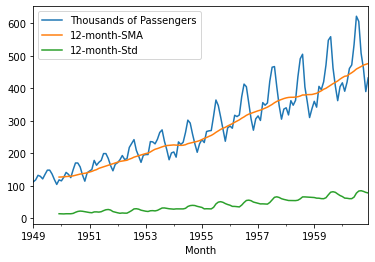

In [243]:
df1['12-month-SMA'] = df1['Thousands of Passengers'].rolling(window=12).mean()
df1['12-month-Std'] = df1['Thousands of Passengers'].rolling(window=12).std()

df1[['Thousands of Passengers','12-month-SMA','12-month-Std']].plot();

Not only is this dataset seasonal with a clear upward trend, the standard deviation increases over time as well.

Sometimes we can visually see if the data is stationary or not just by looking the trend and seasonality as in this case which is non-stationary as it has both trend and seasonality. But inorder to quantify it it is good to use the ADF test

In [244]:
print('Augmented Dickey-Fuller Test on Airline Data')
dftest = adfuller(df1['Thousands of Passengers'],autolag='AIC')
dftest

Augmented Dickey-Fuller Test on Airline Data


(0.8153688792060433,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [247]:
print('Augmented Dickey-Fuller Test on Airline Data')

dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)

Augmented Dickey-Fuller Test on Airline Data
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64


Here we have a very high p-value at 0.99, which provides weak evidence against the null hypothesis, and so we <em>fail to reject</em> the null hypothesis, and decide that our dataset is not stationary.<br>

Now let's apply the ADF test to stationary data with the Daily Total Female Births dataset.

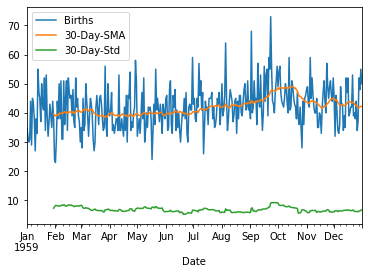

In [248]:
df2['30-Day-SMA'] = df2['Births'].rolling(window=30).mean()
df2['30-Day-Std'] = df2['Births'].rolling(window=30).std()

df2[['Births','30-Day-SMA','30-Day-Std']].plot();

In [249]:
print('Augmented Dickey-Fuller Test on Daily Female Births')
dftest = adfuller(df2['Births'],autolag='AIC')
dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)

Augmented Dickey-Fuller Test on Daily Female Births
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
dtype: float64


In [250]:
print('Augmented Dickey-Fuller Test on Daily Female Births')
dftest = adfuller(df2['Births'],autolag='AIC')
dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)

Augmented Dickey-Fuller Test on Daily Female Births
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
dtype: float64


In this case our p-value is very low at 0.000052, and we do reject the null hypothesis. This dataset appears to have no unit root, and is stationary.

#### Function for running the augmented Dickey-Fuller test

In [251]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

#### Granger Causality Tests
The <a href='https://en.wikipedia.org/wiki/Granger_causality'>Granger causality test</a> is a a hypothesis test to determine if one time series is useful in forecasting another. While it is fairly easy to measure correlations between series - when one goes up the other goes up, and vice versa - it's another thing to observe changes in one series correlated to changes in another after a consistent amount of time. This <em>may</em> indicate the presence of causality, that changes in the first series influenced the behavior of the second. However, it may also be that both series are affected by some third factor, just at different rates. Still, it can be useful if changes in one series can predict upcoming changes in another, whether there is causality or not. In this case we say that one series "Granger-causes" another.

In the case of two series, $y$ and $x$, the null hypothesis is that lagged values of $x$ do <em>not</em> explain variations in $y$.<br>
In other words, it assumes that $x_t$ doesn’t Granger-cause $y_t$.

The stattools <tt><strong>grangercausalitytests</strong></tt> function offers four tests for granger non-causality of 2 timeseries

For this example we'll use the samples.csv file, where columns 'a' and 'd' are stationary datasets.

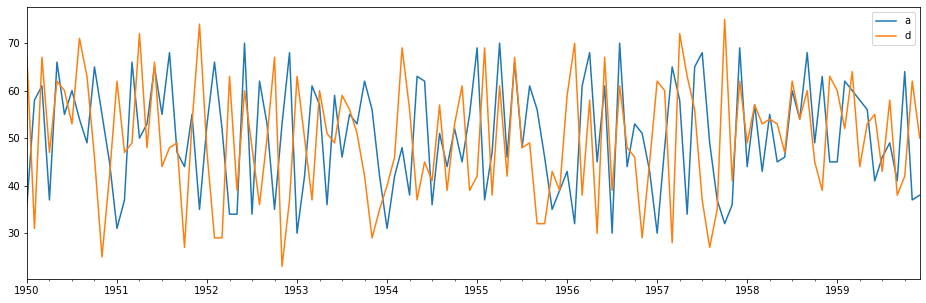

In [252]:
df3 = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\samples.csv',index_col=0,parse_dates=True)
df3.index.freq = 'MS'
df3[['a','d']].plot(figsize=(16,5));

Lets see if shifting d or a could align to one another

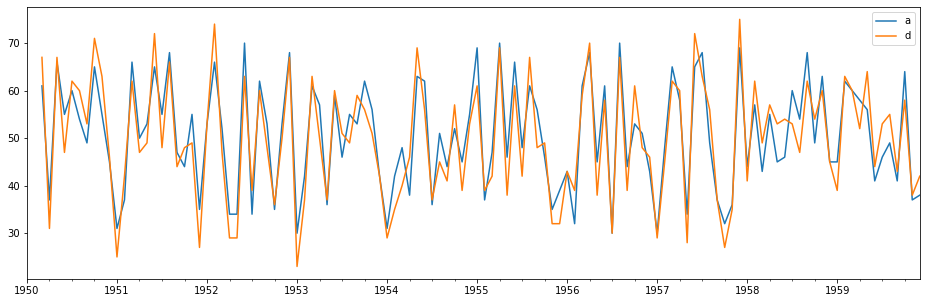

In [253]:
df3['a'].iloc[2:].plot(figsize=(16,5),legend=True);
df3['d'].shift(2).plot(legend=True);

#### Run the test
The function takes in a 2D array [y,x] and a maximum number of lags to test on x. Here our y is column 'a' and x is column 'd'. We'll set maxlags to 3.

In [254]:
grangercausalitytests(df3[['a','d']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


Essentially we're looking for extremely low p-values, which we see at lag 2.<br>
By comparison, let's compare two datasets that are not at all similar, 'b' and 'd'.

In [255]:
grangercausalitytests(df3[['b','d']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


#### Evaluating forecast accuracy

We have already seen MAE,MSE and RMSE but there are more sophisticated tests called AIC and BIC which are more robust

#### AIC / BIC
More sophisticated tests include the <a href='https://en.wikipedia.org/wiki/Akaike_information_criterion'><strong>Akaike information criterion</strong></a> (AIC) and the <a href='https://en.wikipedia.org/wiki/Bayesian_information_criterion'><strong>Bayesian information criterion</strong></a> (BIC).

The AIC evaluates a collection of models and estimates the quality of each model relative to the others. Penalties are provided for the number of parameters used in an effort to thwart overfitting. The lower the AIC and BIC, the better the model should be at forecasting.

These functions are available as

&nbsp;&nbsp;&nbsp;&nbsp;<tt>from from statsmodels.tools.eval_measures import aic, bic</tt>

but we seldom compute them alone as they are built into many of the statsmodels tools we use.

#### Exposing Seasonality with Month and Quarter Plots

Statsmodels has two plotting functions that group data by month and by quarter. Note that if the data appears as months, you should employ resampling with an aggregate function before running a quarter plot. These plots return a matplotlib.Figure object.

In [256]:
df = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

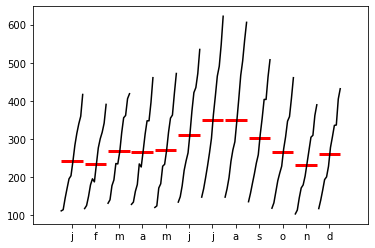

In [257]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot
month_plot(df['Thousands of Passengers']);

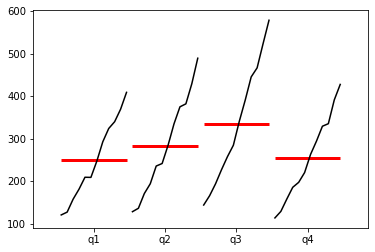

In [258]:
dfq = df['Thousands of Passengers'].resample(rule='Q').mean()

quarter_plot(dfq);

Let's compare this to our nonseasonal macrodata.csv dataset:

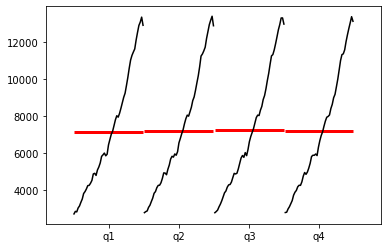

In [259]:
df3 = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\macrodata.csv',index_col=0,parse_dates=True)
quarter_plot(df3['realgdp']);

### ARIMA Models

<strong>ARIMA</strong>, or <em>Autoregressive Integrated Moving Average</em> is actually a combination of 3 models:
* <strong>AR(p)</strong> Autoregression - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period
* <strong>I(d)</strong> Integration - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary
* <strong>MA(q)</strong> Moving Average - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

<strong>Moving Averages</strong> we've already seen with EWMA and the Holt-Winters Method.<br>
<strong>Integration</strong> will apply differencing to make a time series stationary, which ARIMA requires.<br>
<strong>Autoregression</strong> Here we're going to correlate a current time series with a lagged version of the same series.<br>
Once we understand the components, we'll investigate how to best choose the $p$, $d$ and $q$ values required by the model.

The important thing to note is that we might not require all the components of ARIMA(p,q,d) for all kinds of the data. It depends on the nature of data. Few tips would be:
- If the autocorrelation plot shows positive autocorrelation at the first lag then it suggests to use AR terms in relation to the lag
- If the autocorrelation plot shows negative autocorrelation at the first lag then it suggests to use MA terms in relation to the lag
- Typically a sharp drop after lag-k suggests an AR-k model to be used
- If there is a gradual decline, it suggests to us MA model
- Identification of AR model is often best done with PACF
- Identification of MA model is often best done with ACF than PACF
- Sometimes identifying the nature of plots gets difficult with the naked eye. So we could use grid search technique to effectively choose values of p,d,q
- The pmdarima (Pyramid ARIMA) is a seperate library designed to perform grid searches across multiple combinations of p,d,q and P,D,Q
- The pmdarima uses AIC(Akeki Information Criteria) as metric to compare the performances of various ARIMA models

In [260]:
# Load a non-stationary dataset
df1 = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a stationary dataset
df2 = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [261]:
from pmdarima import auto_arima

Let's look first at the stationary, non-seasonal(Stationary) Daily Female Births dataset:

In [262]:
auto_arima(df2['Births'])

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [263]:
auto_arima(df2['Births'],error_action='ignore').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Sun, 25 Apr 2021   AIC                           2459.074
Time:                        00:53:40   BIC                           2470.766
Sample:                             0   HQIC                          2463.721
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

This shows a recommended (p,d,q) ARIMA Order of (1,1,1), with no seasonal_order component.

We can see how this was determined by looking at the stepwise results. The recommended order is the one with the lowest <a href='https://en.wikipedia.org/wiki/Akaike_information_criterion'>Akaike information criterion</a> or AIC score. Note that the recommended model may <em>not</em> be the one with the closest fit. The AIC score takes complexity into account, and tries to identify the best <em>forecasting</em> model.

In [264]:
stepwise_fit = auto_arima(df2['Births'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=12, #months
                          seasonal=False,  #since it is stationary data
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

#produces 7X4=28 models but AIC might not let to run all the 28 models since if AIC doesn't decrease it wont carry on with further p and q values

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2650.760, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2565.234, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2463.584, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2648.768, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2460.154, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2461.271, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2460.722, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2536.154, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2463.056, Time=0.66 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2459.074, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2462.221, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2563.261, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2460.367, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Sun, 25 Apr 2021   AIC                           2459.074
Time:                        01:00:02   BIC                           2470.766
Sample:                             0   HQIC                          2463.721
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Now let's look at the non-stationary, seasonal Airline Passengers dataset:

In [265]:
stepwise_fit = auto_arima(df1['Thousands of Passengers'], start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True,
                          d=None, D=1, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.23 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.14 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.27 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.46 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.29 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.16 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.39 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.45 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.25 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.10 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.51 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Sun, 25 Apr 2021   AIC                           1019.178
Time:                                     01:02:06   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# ARMA(p,q) and ARIMA(p,d,q)
# Autoregressive Moving Averages


Recall that an <strong>AR(1)</strong> model follows the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

while an <strong>MA(1)</strong> model follows the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = \mu + \theta_{1}\varepsilon_{t-1} + \varepsilon_{t}$

where $c$ is a constant, $\mu$ is the expectation of $y_{t}$ (often assumed to be zero), $\phi_1$ (phi-sub-one) is the AR lag coefficient, $\theta_1$ (theta-sub-one) is the MA lag coefficient, and $\varepsilon$ (epsilon) is white noise.

An <strong>ARMA(1,1)</strong> model therefore follows

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \theta_{1}\varepsilon_{t-1} + \varepsilon_{t}$

ARMA models can be used on stationary datasets.

For non-stationary datasets with a trend component, ARIMA models apply a differencing coefficient as well.

In [266]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima

In [267]:
# Load datasets

#Stationary
df1 = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq = 'D'
df1 = df1[:120]  # we only want the first four months

df2 = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\TradeInventories.csv',index_col='Date',parse_dates=True)
df2.index.freq='MS'

In [268]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

#### Autoregressive Moving Average - ARMA(p,q)
In this first section we'll look at a stationary dataset, determine (p,q) orders, and run a forecasting ARMA model fit to the data.

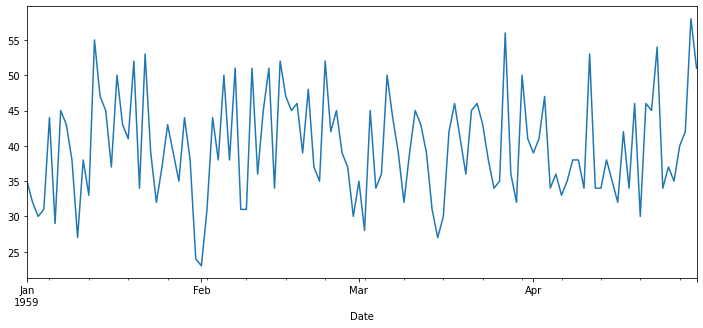

In [269]:
df1['Births'].plot(figsize=(12,5));

In [270]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


#### Determine the (p,q) ARMA Orders using

In [272]:
# Set one month for testing
train = df1.iloc[:90]
test = df1.iloc[90:]

In [273]:
model = ARMA(train['Births'],order=(2,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Sun, 25 Apr 2021   AIC                            627.809
Time:                        01:32:29   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.500      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.800      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.556      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [274]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('ARMA(2,2) Predictions')

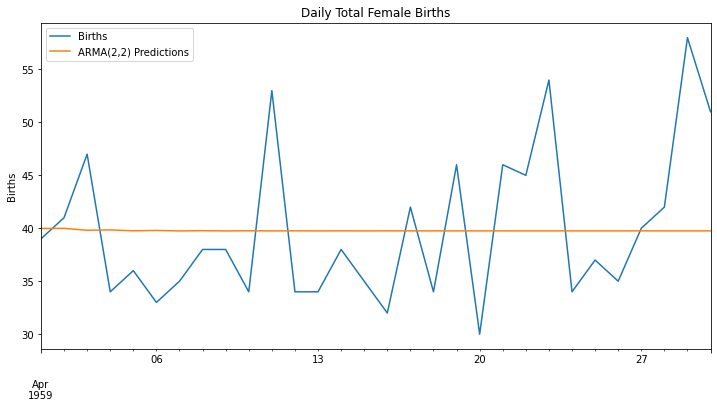

In [275]:
title = 'Daily Total Female Births'
ylabel='Births'
xlabel='' # we don't really need a label here

ax = test['Births'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [276]:
test['Births'].mean()

39.833333333333336

In [277]:
predictions.mean()

39.77743596633806

Since our starting dataset exhibited no trend or seasonal component, this prediction makes sense. Our model predicted the mean value for the test data

#### Autoregressive Integrated Moving Average - ARIMA(p,d,q)
The steps are the same as for ARMA(p,q), except that we'll apply a differencing component to make the dataset stationary.<br>
First let's take a look at the <em>Real Manufacturing and Trade Inventories</em> dataset.


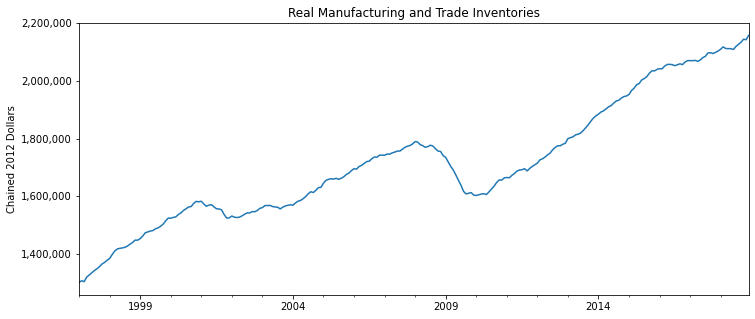

In [278]:
# HERE'S A TRICK TO ADD COMMAS TO Y-AXIS TICK VALUES
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel='' # we don't really need a label here

ax = df2['Inventories'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [279]:
df2.index

DatetimeIndex(['1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Date', length=264, freq='MS')

To know if the data has seasonal component lets run the ETS decomposition test

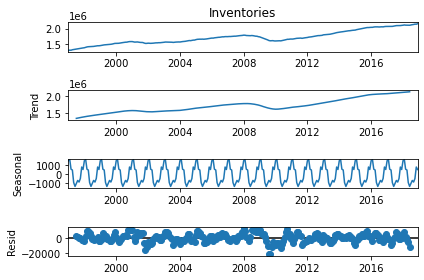

In [280]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df2['Inventories'], model='additive')  # model='add' also works,if the trend looks exponential use mul
result.plot();

In [281]:
#Lets determine the ARIMA orders
auto_arima(df2['Inventories'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Sun, 25 Apr 2021   AIC                           5348.037
Time:                        10:29:44   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

This suggests that we should fit an SARIMAX(0,1,0) model to best forecast future values of the series. Before we train the model, let's look at augmented Dickey-Fuller Test, and the ACF/PACF plots to see if they agree. These steps are optional, and we would likely skip them in practice.

#### Run the augmented Dickey-Fuller Test on the First Difference

In [282]:
from statsmodels.tsa.statespace.tools import diff
df2['d1'] = diff(df2['Inventories'],k_diff=1)

# Equivalent to:
# df1['d1'] = df1['Inventories'] - df1['Inventories'].shift(1)

adf_test(df2['d1'],'Real Manufacturing and Trade Inventories')

Augmented Dickey-Fuller Test: Real Manufacturing and Trade Inventories
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


This confirms that we reached stationarity after the first difference.

This confirms that we reached stationarity after the first difference.
#### Run the ACF and PACF plots
A <strong>PACF Plot</strong> can reveal recommended AR(p) orders, and an <strong>ACF Plot</strong> can do the same for MA(q) orders.<br>

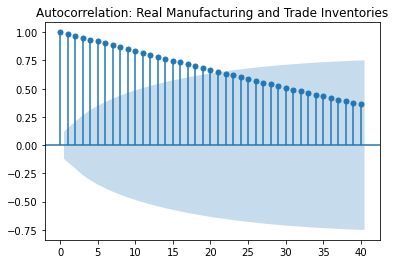

In [283]:
title = 'Autocorrelation: Real Manufacturing and Trade Inventories'
lags = 40
plot_acf(df2['Inventories'],title=title,lags=lags);

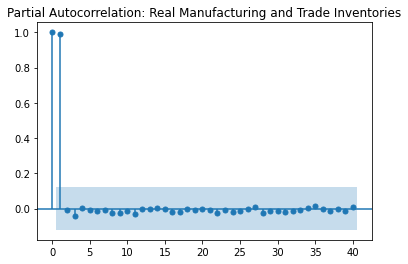

In [284]:
title = 'Partial Autocorrelation: Real Manufacturing and Trade Inventories'
lags = 40
plot_pacf(df2['Inventories'],title=title,lags=lags);

This tells us that the AR component should be more important than MA. href='https://people.duke.edu/~rnau/411arim3.htm'>

If the PACF displays a sharp cutoff while the ACF decays more slowly (i.e., has significant spikes at higher lags), we say that the stationarized series displays an "AR signature," meaning that the autocorrelation pattern can be explained more easily by adding AR terms than by adding MA terms. 

Let's take a look at pmdarima.auto_arima done stepwise to see if having  𝑝  and  𝑞  terms the same still makes sense:

In [285]:
stepwise_fit = auto_arima(df2['Inventories'], start_p=0, start_q=0,
                          max_p=2, max_q=2, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.330 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Sun, 25 Apr 2021   AIC                           5348.037
Time:                        10:44:01   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Looks good from here! Now let's train & test the ARIMA(1,1,1) model, evaluate it, then produce a forecast of future values.

#### Split the data into train/test sets

In [286]:
len(df2)

264

In [287]:
train = df2.iloc[:252]
test = df2.iloc[252:]

In [292]:
model = ARIMA(train['Inventories'].astype('float32'),order=(0,1,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2550.053
Method:                           css   S.D. of innovations           6251.869
Date:                Sun, 25 Apr 2021   AIC                           5104.106
Time:                        10:50:11   BIC                           5111.157
Sample:                    02-01-1997   HQIC                          5106.944
                         - 12-01-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3197.5697    394.614      8.103      0.000    2424.140    3971.000
==============================================================================
"""

In [293]:
end

263

In [294]:
start=len(train)
end=263
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(0,1,0) Predictions')

Passing <tt>dynamic=False</tt> means that forecasts at each point are generated using the full history up to that point (all lagged values).

Passing <tt>typ='levels'</tt> predicts the levels of the original endogenous variables. If we'd used the default <tt>typ='linear'</tt> we would have seen linear predictions in terms of the differenced endogenous variables.

In [295]:
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Inventories'][i]}")

predicted=2106948.57 , expected=2110158
predicted=2110146.139, expected=2118199
predicted=2113343.709, expected=2112427
predicted=2116541.279, expected=2112276
predicted=2119738.849, expected=2111835
predicted=2122936.418, expected=2109298
predicted=2126133.988, expected=2119618
predicted=2129331.558, expected=2127170
predicted=2132529.127, expected=2134172
predicted=2135726.697, expected=2144639
predicted=2138924.267, expected=2143001
predicted=2142121.837, expected=2158115


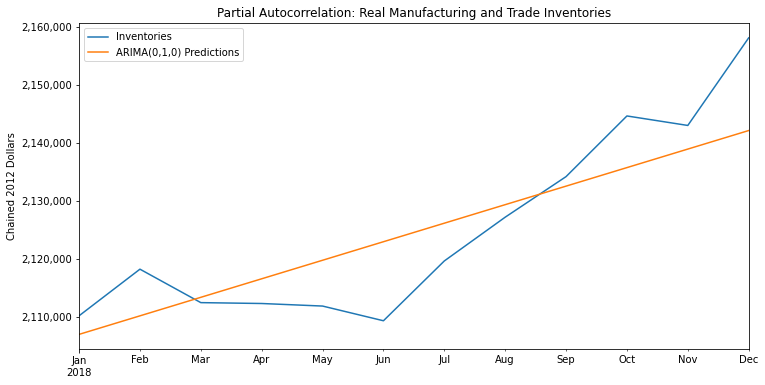

In [296]:
ax = test['Inventories'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

#### Evaluate the Model

In [297]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Inventories'], predictions)
print(f'ARIMA(0,1,0) MSE Error: {error:11.10}')

ARIMA(0,1,0) MSE Error:  62026572.7


In [298]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Inventories'], predictions)
print(f'ARIMA(0,1,0) RMSE Error: {error:11.10}')

ARIMA(0,1,0) RMSE Error: 7875.695061


In [301]:
test['Inventories'].describe()

count    1.200000e+01
mean     2.125076e+06
std      1.632190e+04
min      2.109298e+06
25%      2.112166e+06
50%      2.118908e+06
75%      2.136379e+06
max      2.158115e+06
Name: Inventories, dtype: float64

#### Retrain the model on the full data, and forecast the future

In [304]:
model = ARIMA(df2['Inventories'].astype('float32'),order=(0,1,0))
results = model.fit()
fcast = results.predict(len(df2),len(df2)+11,typ='levels').rename('ARIMA(0,1,0) Forecast')

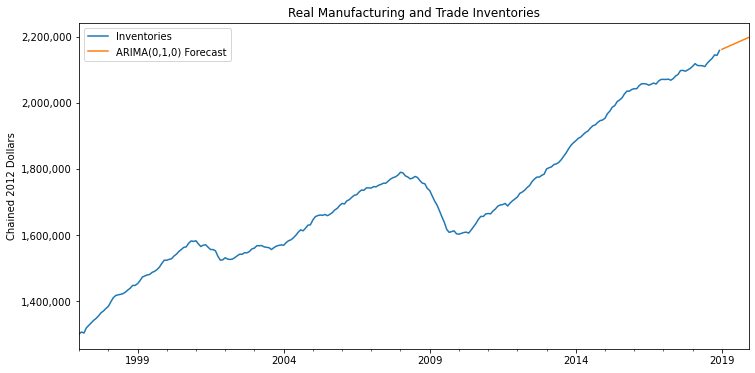

In [305]:
title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel='' 

ax = df2['Inventories'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

### Simple Case Study 4

#### SARIMA(p,d,q)(P,D,Q)m
#### Seasonal Autoregressive Integrated Moving Averages

Where ARIMA accepts the parameters $(p,d,q)$, SARIMA accepts an <em>additional</em> set of parameters $(P,D,Q)m$ that specifically describe the seasonal components of the model. Here $P$, $D$ and $Q$ represent the seasonal regression, differencing and moving average coefficients, and $m$ represents the number of data points (rows) in each seasonal cycle.

<strong>NOTE:</strong> The statsmodels implementation of SARIMA is called SARIMAX. The “X” added to the name means that the function also supports <em>exogenous</em> regressor variables. 

In [306]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima                              

# Load dataset
df = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\co2_mm_mlo.csv')

In [307]:
df.head()

year  month  decimal_date  average  interpolated
0  1958      3      1958.208   315.71        315.71
1  1958      4      1958.292   317.45        317.45
2  1958      5      1958.375   317.50        317.50
3  1958      6      1958.458      NaN        317.10
4  1958      7      1958.542   315.86        315.86

We need to combine two integer columns (year and month) into a DatetimeIndex. We can do this by passing a dictionary into <tt>pandas.to_datetime()</tt> with year, month and day values.

In [308]:
# Add a "date" datetime column
df['date']=pd.to_datetime(dict(year=df['year'], month=df['month'], day=1))

In [309]:
df.set_index('date',inplace=True)
df.index.freq = 'MS'
df.head()

year  month  decimal_date  average  interpolated
date                                                        
1958-03-01  1958      3      1958.208   315.71        315.71
1958-04-01  1958      4      1958.292   317.45        317.45
1958-05-01  1958      5      1958.375   317.50        317.50
1958-06-01  1958      6      1958.458      NaN        317.10
1958-07-01  1958      7      1958.542   315.86        315.86

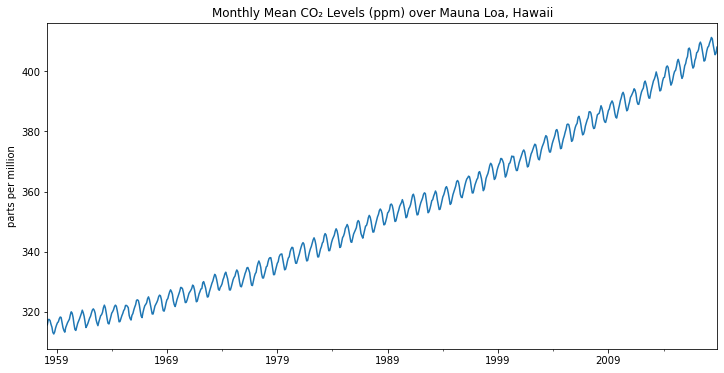

In [310]:
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel='' # we don't really need a label here

ax = df['interpolated'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

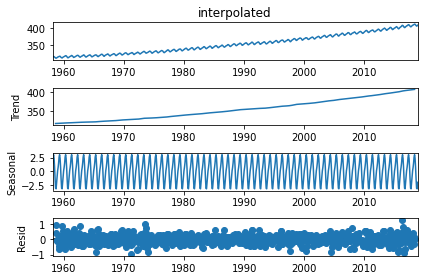

In [311]:
result = seasonal_decompose(df['interpolated'], model='add')
result.plot();

Although small in scale compared to the overall values, there is a definite annual seasonality.

In [312]:
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.252
Date:                            Sun, 25 Apr 2021   AIC                            424.505
Time:                                    13:03:37   BIC                            452.047
Sample:                                         0   HQIC                           435.132
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3519      0.054      6.496      0.000       0.246       0.458
ar.L2          0.0882      0.026      3.406      0.001       0.037       0.139
ma.L1         -0.7077      0.042    -16.937      0.000      -0.790      -0.626
ar.S.L12       0.9996      0.000   2919.641      0.000       0.999       1.000
ma.S.L12      -0.8662      0.021    -40.413      0.000      -0.908      -0.824
sigma2         0.0957      0.005     20.349      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 4.47
Prob(Q):                              0.80   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

This provides an ARIMA Order of (2,1,1) combined with a seasonal order of (1,0,1,12) Now let's train & test the SARIMA(2,1,1)(1,0,1,12) model, evaluate it, then produce a forecast of future values.

#### Split the data into train/test sets

In [313]:
len(df)

729

In [314]:
# Set one year for testing
train = df.iloc[:717]
test = df.iloc[717:]

In [315]:
model = SARIMAX(train['interpolated'],order=(2,1,1),seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -201.927
Date:                            Sun, 25 Apr 2021   AIC                            415.855
Time:                                    13:07:49   BIC                            443.297
Sample:                                03-01-1958   HQIC                           426.451
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3524      0.086      4.081      0.000       0.183       0.522
ar.L2          0.0854      0.055      1.550      0.121      -0.023       0.193
ma.L1         -0.7057      0.086     -8.251      0.000      -0.873      -0.538
ar.S.L12       0.9996      0.000   2684.044      0.000       0.999       1.000
ma.S.L12      -0.8642      0.023    -37.312      0.000      -0.910      -0.819
sigma2         0.0960      0.005     20.358      0.000       0.087       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 4.53
Prob(Q):                              0.80   Prob(JB):                         0.10
Heteroskedasticity (H):               1.14   Skew:                             0.02
Prob(H) (two-sided):                  0.32   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [319]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(2,1,1)(1,0,1,12) Predictions')

In [320]:
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['interpolated'][i]}")

predicted=406.5991363, expected=406.81
predicted=407.8157249, expected=407.96
predicted=408.5701094, expected=408.32
predicted=409.4798125, expected=409.41
predicted=411.0418703, expected=410.24
predicted=411.6465568, expected=411.24
predicted=410.8657314, expected=410.79
predicted=409.1749282, expected=408.71
predicted=407.0752869, expected=406.99
predicted=405.6259685, expected=405.51
predicted=405.8980233, expected=406.0
predicted=407.4327197, expected=408.02


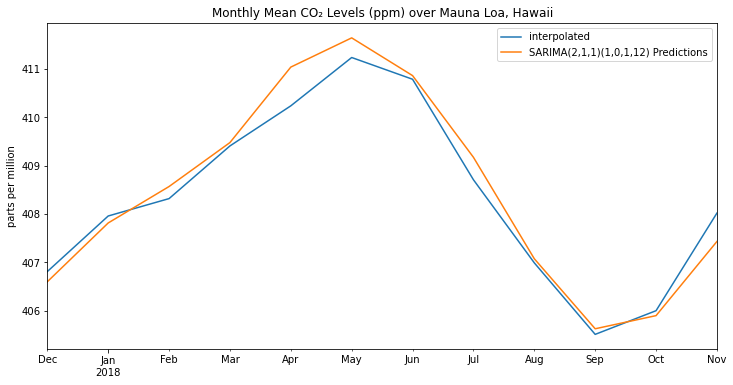

In [321]:
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel=''

ax = test['interpolated'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [322]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['interpolated'], predictions)
print(f'SARIMA(2,1,1)(1,0,1,12) MSE Error: {error:11.10}')

SARIMA(2,1,1)(1,0,1,12) MSE Error: 0.1282421002


In [323]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['interpolated'], predictions)
print(f'SARIMA(2,1,1)(1,0,1,12) RMSE Error: {error:11.10}')

SARIMA(2,1,1)(1,0,1,12) RMSE Error: 0.3581090619


#### Retrain the model on the full data, and forecast the future

In [324]:
model = SARIMAX(df['interpolated'],order=(2,1,1),seasonal_order=(1,0,1,12))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA(2,1,1)(1,0,1,12) Forecast')

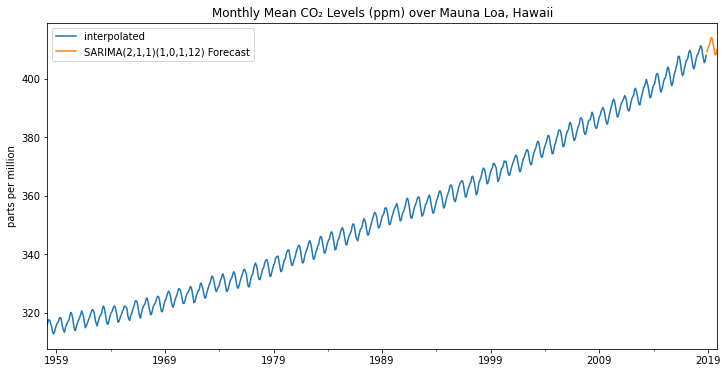

In [325]:
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel=''

ax = df['interpolated'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### Simple Case Study 4

#### Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors
So far the models we've looked at consider past values of a dataset and past errors to determine future trends, seasonality and forecasted values. We look now to models that encompass these non-seasonal (p,d,q) and seasonal (P,D,Q,m) factors, but introduce the idea that external factors (environmental, economic, etc.) can also influence a time series, and be used in forecasting.

In [326]:
# Load dataset
df = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\RestaurantVisitors.csv',index_col='date',parse_dates=True)
df.index.freq = 'D'

The data considers daily visitors to four restaurants located in the United States, subject to American holidays. For the exogenous variable we'll see how holidays affect patronage. The dataset contains 478 days of restaurant data, plus an additional 39 days of holiday data for forecasting purposes.

In [327]:
df.head()

weekday  holiday    holiday_name  rest1  rest2  rest3  rest4  \
date                                                                        
2016-01-01    Friday        1  New Year's Day   65.0   25.0   67.0  139.0   
2016-01-02  Saturday        0              na   24.0   39.0   43.0   85.0   
2016-01-03    Sunday        0              na   24.0   31.0   66.0   81.0   
2016-01-04    Monday        0              na   23.0   18.0   32.0   32.0   
2016-01-05   Tuesday        0              na    2.0   15.0   38.0   43.0   

            total  
date               
2016-01-01  296.0  
2016-01-02  191.0  
2016-01-03  202.0  
2016-01-04  105.0  
2016-01-05   98.0

In [328]:
df.tail()

weekday  holiday  holiday_name  rest1  rest2  rest3  rest4  \
date                                                                       
2017-05-27   Saturday        0            na    NaN    NaN    NaN    NaN   
2017-05-28     Sunday        0            na    NaN    NaN    NaN    NaN   
2017-05-29     Monday        1  Memorial Day    NaN    NaN    NaN    NaN   
2017-05-30    Tuesday        0            na    NaN    NaN    NaN    NaN   
2017-05-31  Wednesday        0            na    NaN    NaN    NaN    NaN   

            total  
date               
2017-05-27    NaN  
2017-05-28    NaN  
2017-05-29    NaN  
2017-05-30    NaN  
2017-05-31    NaN

In [329]:
df1 = df.dropna()
df1.tail()

weekday  holiday holiday_name  rest1  rest2  rest3  rest4  total
date                                                                          
2017-04-18    Tuesday        0           na   30.0   30.0   13.0   18.0   91.0
2017-04-19  Wednesday        0           na   20.0   11.0   30.0   18.0   79.0
2017-04-20   Thursday        0           na   22.0    3.0   19.0   46.0   90.0
2017-04-21     Friday        0           na   38.0   53.0   36.0   38.0  165.0
2017-04-22   Saturday        0           na   97.0   20.0   50.0   59.0  226.0

In [330]:
# Change the dtype of selected columns
cols = ['rest1','rest2','rest3','rest4','total']
for col in cols:
    df1[col] = df1[col].astype(int)
df1.head()

weekday  holiday    holiday_name  rest1  rest2  rest3  rest4  \
date                                                                        
2016-01-01    Friday        1  New Year's Day     65     25     67    139   
2016-01-02  Saturday        0              na     24     39     43     85   
2016-01-03    Sunday        0              na     24     31     66     81   
2016-01-04    Monday        0              na     23     18     32     32   
2016-01-05   Tuesday        0              na      2     15     38     43   

            total  
date               
2016-01-01    296  
2016-01-02    191  
2016-01-03    202  
2016-01-04    105  
2016-01-05     98

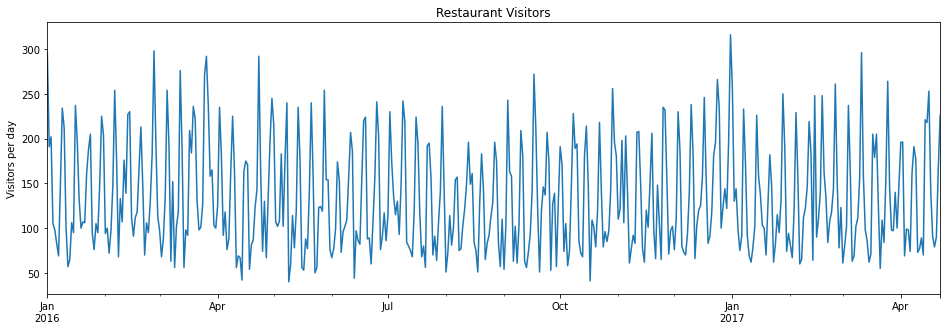

In [331]:
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='' # we don't really need a label here

ax = df1['total'].plot(figsize=(16,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

Rather than prepare a separate plot, we can use matplotlib to shade holidays behind our restaurant data.

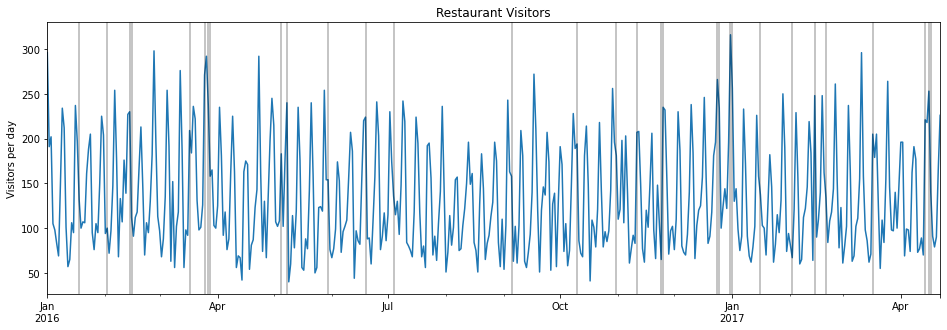

In [332]:
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='' # we don't really need a label here

ax = df1['total'].plot(figsize=(16,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in df1.query('holiday==1').index:       # for days where holiday == 1
    ax.axvline(x=x, color='k', alpha = 0.3);  # add a semi-transparent grey line

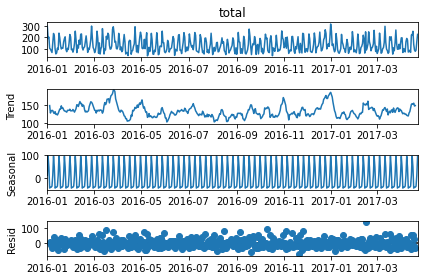

In [333]:
result = seasonal_decompose(df1['total'])
result.plot();

In [334]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [335]:
adf_test(df1['total'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -5.592497
p-value                   0.000001
# lags used              18.000000
# observations          459.000000
critical value (1%)      -3.444677
critical value (5%)      -2.867857
critical value (10%)     -2.570135
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [336]:
# For SARIMA Orders we set seasonal=True and pass in an m value
auto_arima(df1['total'],seasonal=True,m=7).summary() #Each season cycle is a week gap hence m=7

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2384.859
Date:                   Sun, 25 Apr 2021   AIC                           4777.718
Time:                           16:01:51   BIC                           4794.397
Sample:                                0   HQIC                          4784.275
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.7443      1.708      2.777      0.005       1.396       8.093
ar.S.L7        0.9611      0.013     71.651      0.000       0.935       0.987
ma.S.L7       -0.7464      0.051    -14.727      0.000      -0.846      -0.647
sigma2      1256.7889     76.889     16.345      0.000    1106.089    1407.489
===================================================================================
Ljung-Box (L1) (Q):                  16.00   Jarque-Bera (JB):                64.65
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.75
Prob(H) (two-sided):                  0.32   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

SARIMAX(1, 0, [1], 7) is equal to: ARIMA order(0,0,0) and seasonal_order = (1,0,1,7)

We'll assign 42 days (6 weeks) to the test set so that it includes several holidays.

In [337]:
len(df1)

478

In [338]:
train = df1.iloc[:436]
test = df1.iloc[436:]

In [339]:
model = SARIMAX(train['total'],order=(0,0,0),seasonal_order=(1,0,1,7),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2165.369
Date:                   Sun, 25 Apr 2021   AIC                           4336.738
Time:                           16:05:31   BIC                           4348.970
Sample:                       01-01-2016   HQIC                          4341.565
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.9999   9.57e-05   1.05e+04      0.000       1.000       1.000
ma.S.L7       -0.9384      0.024    -39.207      0.000      -0.985      -0.891
sigma2      1111.7992     58.740     18.927      0.000     996.671    1226.928
===================================================================================
Ljung-Box (L1) (Q):                  15.40   Jarque-Bera (JB):                83.57
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.72
Prob(H) (two-sided):                  0.81   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [340]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False).rename('SARIMA(0,0,0)(1,0,1,7) Predictions')

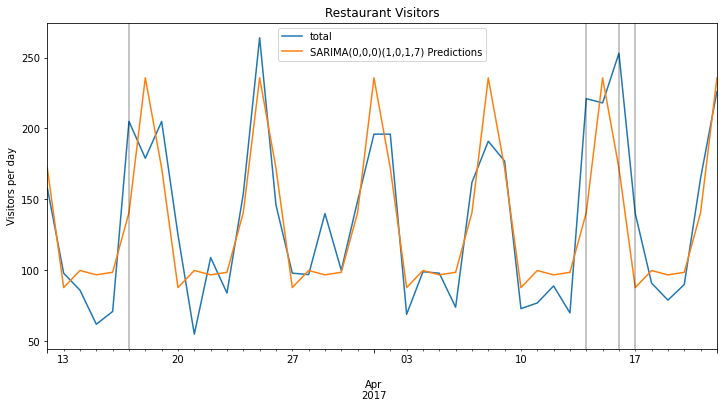

In [341]:
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel=''

ax = test['total'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index: 
    ax.axvline(x=x, color='k', alpha = 0.3);

In [342]:
from statsmodels.tools.eval_measures import mse,rmse

error1 = mse(test['total'], predictions)
error2 = rmse(test['total'], predictions)

print(f'SARIMA(0,0,0)(1,0,1,7) MSE Error: {error1:11.10}')
print(f'SARIMA(0,0,0)(1,0,1,7) RMSE Error: {error2:11.10}')

SARIMA(0,0,0)(1,0,1,7) MSE Error: 1018.405317
SARIMA(0,0,0)(1,0,1,7) RMSE Error: 31.91246334


#### Now add the exog variable

In [343]:
model = SARIMAX(train['total'],exog=train['holiday'],order=(0,0,0),seasonal_order=(1,0,1,7),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2098.580
Date:                   Sun, 25 Apr 2021   AIC                           4205.159
Time:                           16:10:45   BIC                           4221.470
Sample:                       01-01-2016   HQIC                          4211.596
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       70.0736      3.973     17.640      0.000      62.288      77.860
ar.S.L7        1.0000   4.72e-05   2.12e+04      0.000       1.000       1.000
ma.S.L7       -1.0463      0.024    -42.751      0.000      -1.094      -0.998
sigma2       739.3439     49.503     14.935      0.000     642.319     836.368
===================================================================================
Ljung-Box (L1) (Q):                  15.36   Jarque-Bera (JB):                21.14
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.23
Prob(H) (two-sided):                  0.96   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [344]:
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test[['holiday']]  # requires two brackets to yield a shape of (35,1)
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX(0,0,0)(1,0,1,7) Predictions')

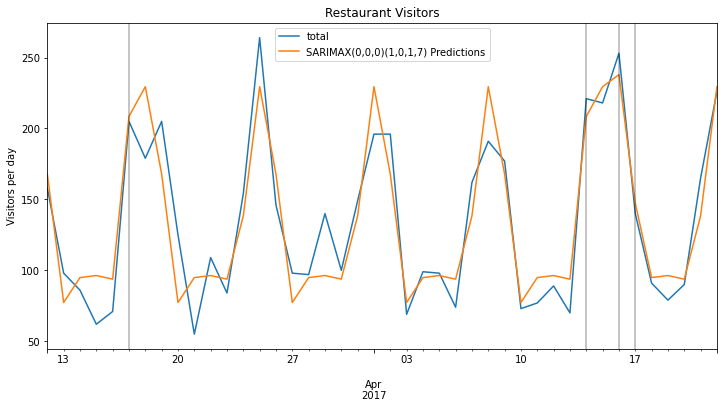

In [345]:
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel=''

ax = test['total'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index: 
    ax.axvline(x=x, color='k', alpha = 0.3);

In [346]:
# Print values from SARIMA above
print(f'SARIMA(0,0,0)(1,0,1,7) MSE Error: {error1:11.10}')
print(f'SARIMA(0,0,0)(1,0,1,7) RMSE Error: {error2:11.10}')
print()

error1x = mse(test['total'], predictions)
error2x = rmse(test['total'], predictions)

# Print new SARIMAX values
print(f'SARIMAX(0,0,0)(1,0,1,7) MSE Error: {error1x:11.10}')
print(f'SARIMAX(0,0,0)(1,0,1,7) RMSE Error: {error2x:11.10}')

SARIMA(0,0,0)(1,0,1,7) MSE Error: 1018.405317
SARIMA(0,0,0)(1,0,1,7) RMSE Error: 31.91246334

SARIMAX(0,0,0)(1,0,1,7) MSE Error: 520.3649967
SARIMAX(0,0,0)(1,0,1,7) RMSE Error: 22.81151018


Adding exog variable improved the performance

#### Retrain the model on the full data, and forecast the future

In [349]:
model = SARIMAX(df1['total'],exog=df1['holiday'],order=(0,0,0),seasonal_order=(1,0,1,7),enforce_invertibility=False)
results = model.fit()
exog_forecast = df[478:][['holiday']]
fcast = results.predict(len(df1),len(df1)+38,exog=exog_forecast).rename('SARIMAX(1,0,0)(2,0,0,7) Forecast')

In [347]:
df.shape

(517, 8)

In [348]:
df1.shape

(478, 8)

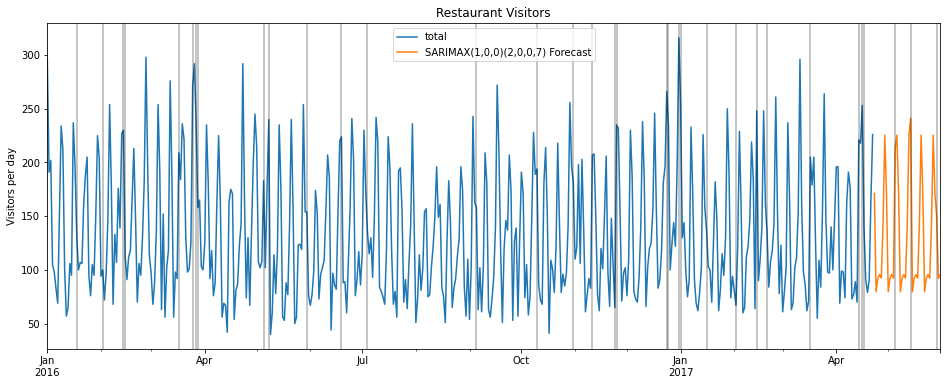

In [350]:
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel=''

ax = df1['total'].plot(legend=True,figsize=(16,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in df.query('holiday==1').index: 
    ax.axvline(x=x, color='k', alpha = 0.3);

#### VAR(p)
#### Vector Autoregression
In our previous SARIMAX example, the forecast variable $y_t$ was influenced by the exogenous predictor variable, but not vice versa. That is, the occurrence of a holiday affected restaurant patronage but not the other way around.

However, there are some cases where variables affect each other. <a href='https://otexts.com/fpp2/VAR.html'>Forecasting: Principles and Practice</a> describes a case where changes in personal consumption expenditures $C_t$ were forecast based on changes in personal disposable income $I_t$.

For this analysis we'll also compare money to spending. We'll look at the M2 Money Stock which is a measure of U.S. personal assets, and U.S. personal spending. Both datasets are in billions of dollars, monthly, seasonally adjusted. They span the 21 years from January 1995 to December 2015 (252 records).

In [351]:
# Load datasets
df = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\M2SLMoneyStock.csv',index_col=0, parse_dates=True)
df.index.freq = 'MS'

sp = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\PCEPersonalSpending.csv',index_col=0, parse_dates=True)
sp.index.freq = 'MS'

In [352]:
df = df.join(sp)
df.head()

Money  Spending
Date                        
1995-01-01  3492.4    4851.2
1995-02-01  3489.9    4850.8
1995-03-01  3491.1    4885.4
1995-04-01  3499.2    4890.2
1995-05-01  3524.2    4933.1

In [353]:
df = df.dropna()
df.shape

(252, 2)

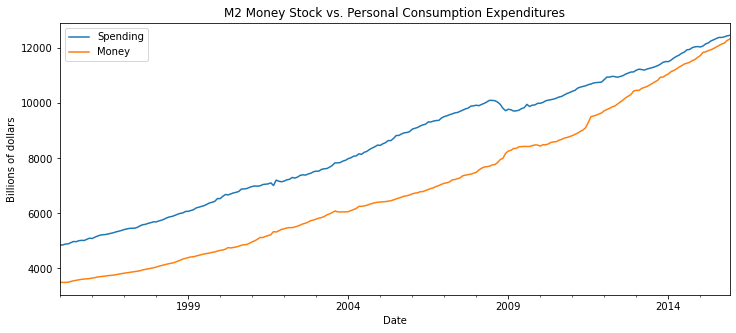

In [354]:
title = 'M2 Money Stock vs. Personal Consumption Expenditures'
ylabel='Billions of dollars'
xlabel=''

ax = df['Spending'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
df['Money'].plot(legend=True);

In [355]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [356]:
adf_test(df['Money'],title='Money')

Augmented Dickey-Fuller Test: Money
ADF test statistic        4.239022
p-value                   1.000000
# lags used               4.000000
# observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [357]:
adf_test(df['Spending'], title='Spending')

Augmented Dickey-Fuller Test: Spending
ADF test statistic        0.149796
p-value                   0.969301
# lags used               3.000000
# observations          248.000000
critical value (1%)      -3.456996
critical value (5%)      -2.873266
critical value (10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


Neither variable is stationary, so we'll take a first order difference of the entire DataFrame and re-run the augmented Dickey-Fuller tests. It's advisable to save transformed values in a new DataFrame, as we'll need the original when we later invert the transormations and evaluate the model

In [358]:
df_transformed = df.diff()

In [359]:
df_transformed = df_transformed.dropna()
adf_test(df_transformed['Money'], title='MoneyFirstDiff')
print()
adf_test(df_transformed['Spending'], title='SpendingFirstDiff')

Augmented Dickey-Fuller Test: MoneyFirstDiff
ADF test statistic       -2.057404
p-value                   0.261984
# lags used              15.000000
# observations          235.000000
critical value (1%)      -3.458487
critical value (5%)      -2.873919
critical value (10%)     -2.573367
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary

Augmented Dickey-Fuller Test: SpendingFirstDiff
ADF test statistic     -7.226974e+00
p-value                 2.041027e-10
# lags used             2.000000e+00
# observations          2.480000e+02
critical value (1%)    -3.456996e+00
critical value (5%)    -2.873266e+00
critical value (10%)   -2.573019e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Since Money is not yet stationary, we'll apply second order differencing to both series so they retain the same number of observations

In [360]:
df_transformed = df_transformed.diff().dropna()
adf_test(df_transformed['Money'], title='MoneySecondDiff')
print()
adf_test(df_transformed['Spending'], title='SpendingSecondDiff')

Augmented Dickey-Fuller Test: MoneySecondDiff
ADF test statistic     -7.077471e+00
p-value                 4.760675e-10
# lags used             1.400000e+01
# observations          2.350000e+02
critical value (1%)    -3.458487e+00
critical value (5%)    -2.873919e+00
critical value (10%)   -2.573367e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: SpendingSecondDiff
ADF test statistic     -8.760145e+00
p-value                 2.687900e-14
# lags used             8.000000e+00
# observations          2.410000e+02
critical value (1%)    -3.457779e+00
critical value (5%)    -2.873609e+00
critical value (10%)   -2.573202e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [361]:
df_transformed.head()

Money  Spending
Date                       
1995-03-01    3.7      35.0
1995-04-01    6.9     -29.8
1995-05-01   16.9      38.1
1995-06-01   -0.3       1.5
1995-07-01   -6.2     -51.7

In [362]:
len(df_transformed)

250

#### Train/test split

In [363]:
nobs=12
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [364]:
print(train.shape)
print(test.shape)

(238, 2)
(12, 2)


#### VAR Model Order Selection
We'll fit a series of models using the first seven p-values, and base our final selection on the model that provides the lowest AIC and BIC scores.

In [368]:
from statsmodels.tsa.api import VAR

model = VAR(train)
for i in [1,2,3,4,5,6,7]:
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  14.178610495220896
BIC:  14.266409486135709

Order = 2
AIC:  13.955189367163703
BIC:  14.101961901274956

Order = 3
AIC:  13.849518291541038
BIC:  14.055621258341116

Order = 4
AIC:  13.827950574458281
BIC:  14.093744506408875

Order = 5
AIC:  13.78730034460964
BIC:  14.113149468980652

Order = 6
AIC:  13.799076756885809
BIC:  14.185349048538068

Order = 7
AIC:  13.79763872791397
BIC:  14.24470596304667



The VAR(5) model seems to return the lowest combined scores.<br>
Just to verify that both variables are included in the model we can run <tt>.endog_names</tt>

In [369]:
model.endog_names

['Money', 'Spending']

In [370]:
results = model.fit(5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 25, Apr, 2021
Time:                     19:54:35
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

In [371]:
#Grab the 5 lagged values before the test set starts
lag_order = results.k_ar
lag_order

5

In [372]:
z = results.forecast(y=train.values[-lag_order:], steps=12)
z

array([[-16.99527634,  36.14982003],
       [ -3.17403756, -11.45029844],
       [ -0.377725  ,  -6.68496939],
       [ -2.60223305,   5.47945777],
       [  4.228557  ,  -2.44336505],
       [  1.55939341,   0.38763902],
       [ -0.99841027,   3.88368011],
       [  0.36451042,  -2.3561014 ],
       [ -1.21062726,  -1.22414652],
       [  0.22587712,   0.786927  ],
       [  1.33893884,   0.18097449],
       [ -0.21858453,   0.21275046]])

In [373]:
test

Money  Spending
Date                       
2015-01-01  -15.5     -26.6
2015-02-01   56.1      52.4
2015-03-01 -102.8      39.5
2015-04-01   30.9     -40.4
2015-05-01  -15.8      38.8
2015-06-01   14.0     -34.1
2015-07-01    6.7       6.9
2015-08-01   -0.7      -8.5
2015-09-01    5.5     -39.8
2015-10-01  -23.1      24.5
2015-11-01   55.8      10.7
2015-12-01  -31.2     -15.0

In [374]:
idx = pd.date_range('1/1/2015', periods=12, freq='MS')
df_forecast = pd.DataFrame(z, index=idx, columns=['Money2d','Spending2d'])
df_forecast

Money2d  Spending2d
2015-01-01 -16.995276   36.149820
2015-02-01  -3.174038  -11.450298
2015-03-01  -0.377725   -6.684969
2015-04-01  -2.602233    5.479458
2015-05-01   4.228557   -2.443365
2015-06-01   1.559393    0.387639
2015-07-01  -0.998410    3.883680
2015-08-01   0.364510   -2.356101
2015-09-01  -1.210627   -1.224147
2015-10-01   0.225877    0.786927
2015-11-01   1.338939    0.180974
2015-12-01  -0.218585    0.212750

#### Invert the Transformation

Remember that the forecasted values represent second-order differences. To compare them to the original data we have to roll back each difference. To roll back a first-order difference we take the most recent value on the training side of the original series, and add it to a cumulative sum of forecasted values. When working with second-order differences we first must perform this operation on the most recent first-order difference.

In [375]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money1d'].cumsum()

In [376]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending1d'].cumsum()

In [377]:
df_forecast

Money2d  Spending2d    Money1d  MoneyForecast  Spending1d  \
2015-01-01 -16.995276   36.149820  61.604724   11731.704724   46.749820   
2015-02-01  -3.174038  -11.450298  58.430686   11790.135410   35.299522   
2015-03-01  -0.377725   -6.684969  58.052961   11848.188371   28.614552   
2015-04-01  -2.602233    5.479458  55.450728   11903.639099   34.094010   
2015-05-01   4.228557   -2.443365  59.679285   11963.318384   31.650645   
2015-06-01   1.559393    0.387639  61.238678   12024.557062   32.038284   
2015-07-01  -0.998410    3.883680  60.240268   12084.797331   35.921964   
2015-08-01   0.364510   -2.356101  60.604779   12145.402109   33.565863   
2015-09-01  -1.210627   -1.224147  59.394151   12204.796261   32.341716   
2015-10-01   0.225877    0.786927  59.620028   12264.416289   33.128643   
2015-11-01   1.338939    0.180974  60.958967   12325.375256   33.309618   
2015-12-01  -0.218585    0.212750  60.740383   12386.115639   33.522368   

            SpendingForecast  
2015-01-01      12108.749820  
2015-02-01      12144.049342  
2015-03-01      12172.663894  
2015-04-01      12206.757904  
2015-05-01      12238.408549  
2015-06-01      12270.446833  
2015-07-01      12306.368797  
2015-08-01      12339.934659  
2015-09-01      12372.276375  
2015-10-01      12405.405019  
2015-11-01      12438.714636  
2015-12-01      12472.237004

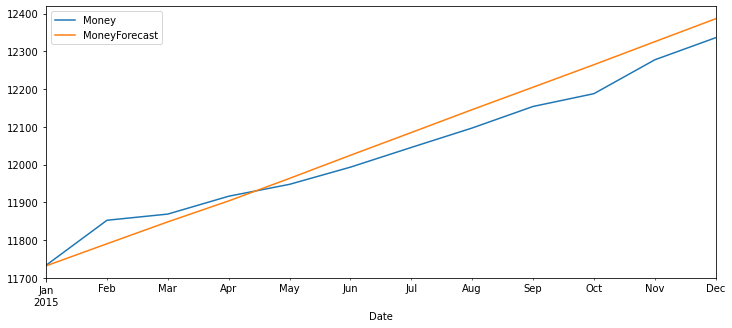

In [378]:
df['Money'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['MoneyForecast'].plot(legend=True);

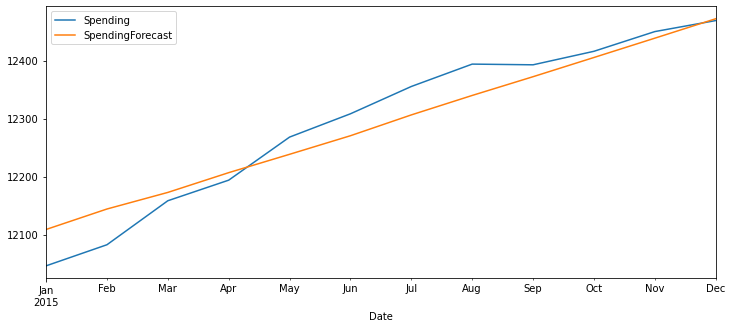

In [379]:
df['Spending'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['SpendingForecast'].plot(legend=True);

#### Evaluate the model

In [380]:
RMSE1 = rmse(df['Money'][-nobs:], df_forecast['MoneyForecast'])
print(f'Money VAR(5) RMSE: {RMSE1:.3f}')

Money VAR(5) RMSE: 43.710


In [381]:
RMSE2 = rmse(df['Spending'][-nobs:], df_forecast['SpendingForecast'])
print(f'Spending VAR(5) RMSE: {RMSE2:.3f}')

Spending VAR(5) RMSE: 37.001


#### Let's compare these results to individual AR(5) models

#### Money

In [382]:
from statsmodels.tsa.ar_model import AR,ARResults

modelM = AR(train['Money'])
AR5fit1 = modelM.fit(maxlag=5,method='mle')
print(f'Lag: {AR5fit1.k_ar}')
print(f'Coefficients:\n{AR5fit1.params}')

Lag: 5
Coefficients:
const       0.585204
L1.Money   -0.605217
L2.Money   -0.465398
L3.Money   -0.228645
L4.Money   -0.311355
L5.Money   -0.127614
dtype: float64


In [383]:
start=len(train)
end=len(train)+len(test)-1
z1 = pd.DataFrame(AR5fit1.predict(start=start, end=end, dynamic=False),columns=['Money'])

In [384]:
z1

Money
2015-01-01 -16.911064
2015-02-01 -11.347186
2015-03-01   9.669317
2015-04-01  -5.699584
2015-05-01   2.353692
2015-06-01   5.293521
2015-07-01  -3.973280
2015-08-01   0.528804
2015-09-01   0.898493
2015-10-01  -1.244737
2015-11-01   1.361050
2015-12-01   0.477734

In [385]:
# Add the most recent first difference from the training set to the forecast cumulative sum
z1['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + z1['Money'].cumsum()

# Now build the forecast values from the first difference set
z1['MoneyForecast'] = df['Money'].iloc[-nobs-1] + z1['Money1d'].cumsum()

In [386]:
z1

Money    Money1d  MoneyForecast
2015-01-01 -16.911064  61.688936   11731.788936
2015-02-01 -11.347186  50.341750   11782.130686
2015-03-01   9.669317  60.011068   11842.141754
2015-04-01  -5.699584  54.311484   11896.453238
2015-05-01   2.353692  56.665176   11953.118414
2015-06-01   5.293521  61.958697   12015.077111
2015-07-01  -3.973280  57.985417   12073.062529
2015-08-01   0.528804  58.514221   12131.576750
2015-09-01   0.898493  59.412714   12190.989463
2015-10-01  -1.244737  58.167976   12249.157440
2015-11-01   1.361050  59.529026   12308.686466
2015-12-01   0.477734  60.006761   12368.693226

In [387]:
RMSE3 = rmse(df['Money'][-nobs:], z1['MoneyForecast'])

print(f'Money VAR(5) RMSE: {RMSE1:.3f}')
print(f'Money  AR(5) RMSE: {RMSE3:.3f}')

Money VAR(5) RMSE: 43.710
Money  AR(5) RMSE: 36.222


#### Personal Spending

In [388]:
modelS = AR(train['Spending'])
AR5fit2 = modelS.fit(maxlag=5,method='mle')
print(f'Lag: {AR5fit2.k_ar}')
print(f'Coefficients:\n{AR5fit2.params}')

Lag: 5
Coefficients:
const          0.221122
L1.Spending   -0.913123
L2.Spending   -0.677036
L3.Spending   -0.450797
L4.Spending   -0.273219
L5.Spending   -0.159475
dtype: float64


In [389]:
z2 = pd.DataFrame(AR5fit2.predict(start=start, end=end, dynamic=False),columns=['Spending'])
z2

Spending
2015-01-01  30.883304
2015-02-01  -2.227348
2015-03-01  -8.838630
2015-04-01   6.673499
2015-05-01  -4.483694
2015-06-01  -0.535029
2015-07-01   3.506977
2015-08-01  -1.011495
2015-09-01  -0.827644
2015-10-01   0.941959
2015-11-01  -0.495526
2015-12-01   0.126044

In [390]:
# Add the most recent first difference from the training set to the forecast cumulative sum
z2['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + z2['Spending'].cumsum()

# Now build the forecast values from the first difference set
z2['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + z2['Spending1d'].cumsum()

In [391]:
z2

Spending  Spending1d  SpendingForecast
2015-01-01  30.883304   41.483304      12103.483304
2015-02-01  -2.227348   39.255957      12142.739261
2015-03-01  -8.838630   30.417327      12173.156588
2015-04-01   6.673499   37.090825      12210.247413
2015-05-01  -4.483694   32.607132      12242.854545
2015-06-01  -0.535029   32.072103      12274.926648
2015-07-01   3.506977   35.579080      12310.505728
2015-08-01  -1.011495   34.567586      12345.073314
2015-09-01  -0.827644   33.739942      12378.813256
2015-10-01   0.941959   34.681901      12413.495157
2015-11-01  -0.495526   34.186375      12447.681533
2015-12-01   0.126044   34.312419      12481.993951

In [392]:
RMSE4 = rmse(df['Spending'][-nobs:], z2['SpendingForecast'])

print(f'Spending VAR(5) RMSE: {RMSE2:.3f}')
print(f'Spending  AR(5) RMSE: {RMSE4:.3f}')

Spending VAR(5) RMSE: 37.001
Spending  AR(5) RMSE: 34.122


<strong>CONCLUSION:</strong> It looks like the VAR(5) model did <em>not</em> do better than the individual AR(5) models.

#### Exercsie 4

In [393]:
df = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


So <tt>df</tt> has 348 records and one column. The data represents the number of employees in thousands of persons as monthly averages from January, 1990 to December 2018.

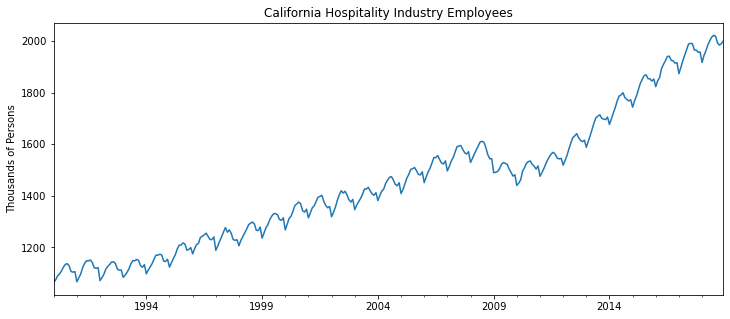

In [394]:
#plot
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel='' # we don't really need a label here

ax = df['Employees'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

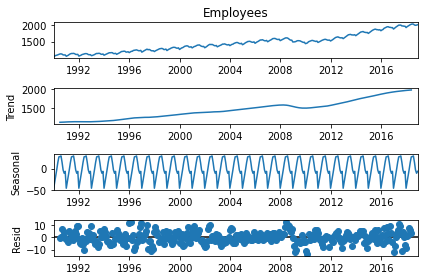

In [395]:
#ETS decomposition
result = seasonal_decompose(df['Employees'], model='add')
result.plot();

In [396]:
auto_arima(df['Employees'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Sun, 25 Apr 2021   AIC                           2208.504
Time:                                      23:21:11   BIC                           2231.600
Sample:                                           0   HQIC                          2217.700
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.562      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.514      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.145      0.032       0.011       0.246
ar.S.L12       0.9972      0.001    703.955      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.321      0.000      -0.834      -0.664
sigma2        29.2989      1.717     17.062      0.000      25.933      32.664
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [397]:
#split
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [398]:
model = SARIMAX(train['Employees'],order=(1,1,2),seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Sun, 25 Apr 2021   AIC                           2128.116
Time:                                      23:22:30   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.043     21.280      0.000       0.839       1.009
ma.L1         -0.9584      0.070    -13.622      0.000      -1.096      -0.821
ma.L2          0.1498      0.061      2.452      0.014       0.030       0.270
ar.S.L12       0.9973      0.001    729.998      0.000       0.995       1.000
ma.S.L12      -0.7519      0.044    -17.165      0.000      -0.838      -0.666
sigma2        28.7644      1.684     17.080      0.000      25.464      32.065
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.32
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [399]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(1,1,2)(1,0,1,12) Predictions')

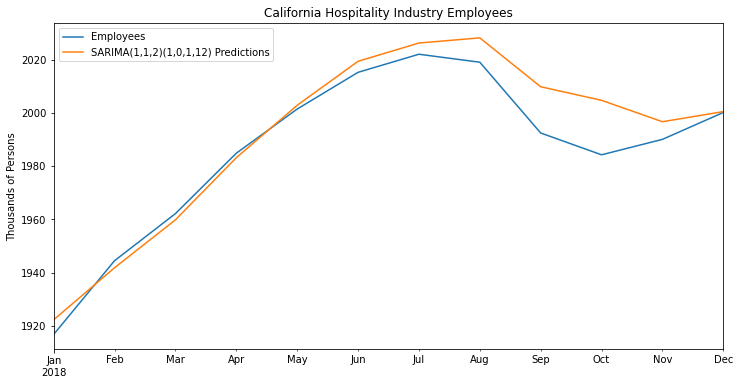

In [400]:
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel=''

ax = test['Employees'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [401]:
#Evaluate
error1 = mean_squared_error(test['Employees'], predictions)
error2 = rmse(test['Employees'], predictions)
print(f'SARIMA(0,1,0)(2,0,0,12) MSE Error: {error1:11.10}')
print(f'SARIMA(0,1,0)(2,0,0,12) RMSE Error: {error2:11.10}')

SARIMA(0,1,0)(2,0,0,12) MSE Error: 77.64367386
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 8.811564779


In [402]:
#Retrain on full data
model = SARIMAX(df['Employees'],order=(1,1,2),seasonal_order=(1,0,1,12))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA(0,1,0)(2,0,0,12) Forecast')

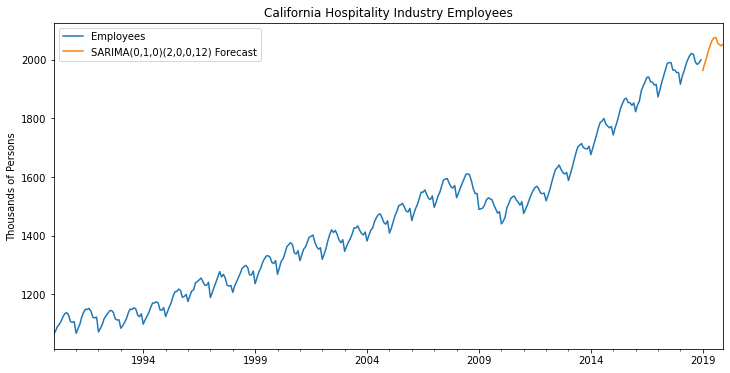

In [403]:
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel=''

ax = df['Employees'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

#### Simple Case Study 5

### Deep Learning(LSTM) for Time Series

LSTMs work good for sequential data. Time Series is also sequential data which is passed to LSTM layers to forecast the results.

In [404]:
df = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\Alcohol_Sales.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [405]:
df.head()

S4248SM144NCEN
DATE                      
1992-01-01            3459
1992-02-01            3458
1992-03-01            4002
1992-04-01            4564
1992-05-01            4221

In [406]:
df.columns = ['Sales']

<AxesSubplot:xlabel='DATE'>

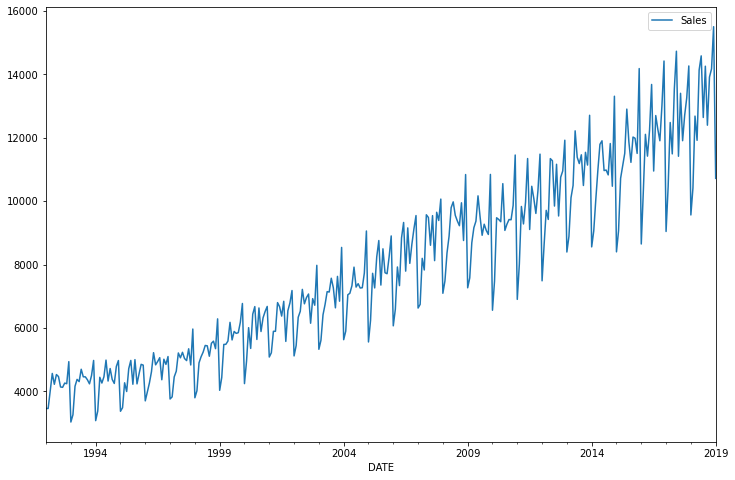

In [407]:
df.plot(figsize=(12,8))

In [408]:
from statsmodels.tsa.seasonal import seasonal_decompose

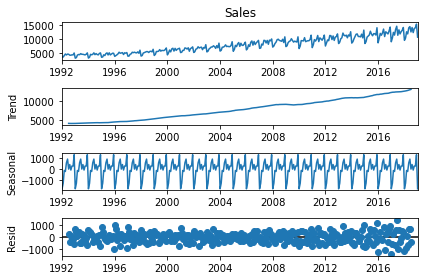

In [414]:
results = seasonal_decompose(df['Sales'])
results.plot();

<AxesSubplot:xlabel='DATE'>

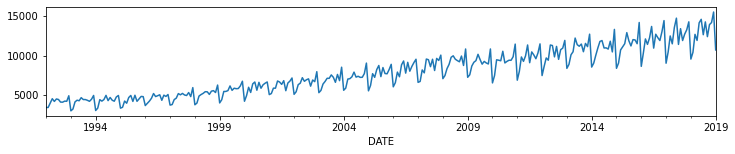

In [415]:
results.observed.plot(figsize=(12,2))

<AxesSubplot:xlabel='DATE'>

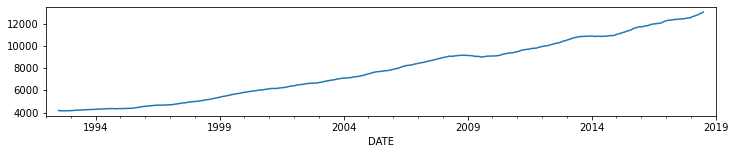

In [416]:
results.trend.plot(figsize=(12,2))

<AxesSubplot:xlabel='DATE'>

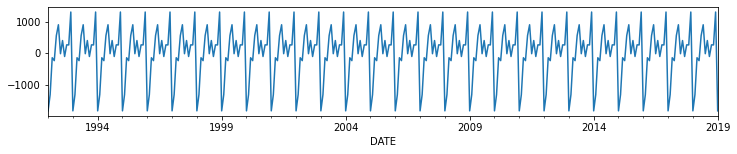

In [417]:
results.seasonal.plot(figsize=(12,2))

<AxesSubplot:xlabel='DATE'>

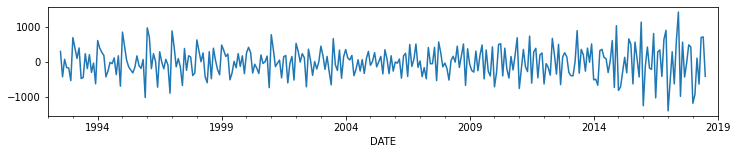

In [418]:
results.resid.plot(figsize=(12,2))

In [419]:
len(df)

325

In [420]:
325-12

313

In [421]:
train = df.iloc[:313]
test = df.iloc[313:]

In [422]:
len(test)

12

In [423]:
from sklearn.preprocessing import MinMaxScaler

In [424]:
scaler = MinMaxScaler()

In [425]:
scaler.fit(train)

MinMaxScaler()

In [426]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

#### Time Series Generator

In [427]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [429]:
scaled_train    

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ],
       [0.12804513],
       [0.12266006],
       [0.09453799],
       [0.09359774],
       [0.10496624],
       [0.10334217],
       [0.16283443],
       [0.        ],
       [0.0196598 ],
       [0.09650397],
       [0.11505257],
       [0.10906915],
       [0.14231986],
       [0.12197624],
       [0.12189076],
       [0.11394136],
       [0.10300026],
       [0.12556629],
       [0.16608257],
       [0.00376101],
       [0.02957518],
       [0.12069408],
       [0.10513719],
       [0.12214719],
       [0.16702282],
       [0.11052227],
       [0.14428584],
       [0.11479614],
       [0.10402599],
       [0.14984187],
       [0.16582614],
       [0.02897684],
       [0.03872126],
       [0.10582101],
       [0.08231473],
       [0.14394393],
       [0.16608257],
       [0.10188905],
       [0.16830498],
       [0.10291478],
       [0.13018207],
       [0.15556885],
       [0.153

In [430]:
# define generator
#[t1,t2] --> [t3]
#[t2,t3] --> [t4]
n_input = 2 
n_features = 1                  #feature       #target       
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [428]:
len(scaled_train)

313

In [431]:
len(generator)

311

In [432]:
# What does the first batch look like?
X,y = generator[0]

In [433]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03658432 0.03649885]
Predict this y: 
 [[0.08299855]]


In [435]:
# Let's redefine to get 12 months back and then predict the next month out
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [436]:
# What does the first batch look like?
X,y = generator[0]

In [439]:
X.shape #TimeseriesGenerator accepts only 3d input

(1, 12, 1)

In [437]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03658432 0.03649885 0.08299855 0.13103684 0.1017181  0.12804513
 0.12266006 0.09453799 0.09359774 0.10496624 0.10334217 0.16283443]
Predict this y: 
 [[0.]]


#### Create the Model

In [438]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [440]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1)) #Output the predicted sales
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [441]:
model.fit_generator(generator,epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
301/301 [==============================] - 1s 4ms/step - loss: 0.0189
Epoch 2/50
301/301 [==============================] - 1s 3ms/step - loss: 0.0090
Epoch 3/50
301/301 [==============================] - 1s 3ms/step - loss: 0.0086
Epoch 4/50
301/301 [==============================] - 1s 4ms/step - loss: 0.0088A: 0s - loss: - ETA: 0s - loss: 0
Epoch 5/50
301/301 [==============================] - 1s 4ms/step - loss: 0.0081
Epoch 6/50
301/301 [==============================] - 1s 5ms/step - loss: 0.0069
Epoch 7/50
301/301 [==============================] - 1s 5ms/step - loss: 0.0058
Epoch 8/50
301/301 [==============================] - 1s 4ms/step - loss: 0.0042
Epoch 9/50
301/301 [==============================] - 1s 4ms/step - loss: 0.0031
Epoch 10/50
301/301 [==============================] - 1s 4ms/step - loss: 0.0031
Epoch 11/50
301/301 [==============================] - 1s 3ms/step - loss: 0.002

In [442]:
model.history.history.keys()

dict_keys(['loss'])

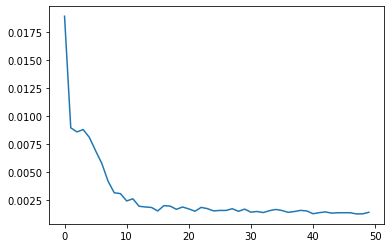

In [443]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

#### Evaluate on Test Data

In [444]:
first_eval_batch = scaled_train[-12:]

In [445]:
first_eval_batch

array([[0.63432772],
       [0.80776135],
       [0.72313873],
       [0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ]])

In [446]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features)) #3d input

In [447]:
model.predict(first_eval_batch)

array([[0.7135322]], dtype=float32)

In [448]:
scaled_test[0]

array([0.63116506])

In [449]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [450]:
test_predictions

[array([0.7135322], dtype=float32),
 array([0.83052415], dtype=float32),
 array([0.79058903], dtype=float32),
 array([0.9644285], dtype=float32),
 array([1.0319453], dtype=float32),
 array([0.7775374], dtype=float32),
 array([0.93844914], dtype=float32),
 array([0.7965938], dtype=float32),
 array([0.8869514], dtype=float32),
 array([0.92527086], dtype=float32),
 array([1.0029609], dtype=float32),
 array([0.6046795], dtype=float32)]

In [451]:
scaled_test

array([[0.63116506],
       [0.82502778],
       [0.75972305],
       [0.94939738],
       [0.98743482],
       [0.82135225],
       [0.95956919],
       [0.80049577],
       [0.93025045],
       [0.95247457],
       [1.0661595 ],
       [0.65706471]])

#### Inverse Transformations and Compare

In [452]:
true_predictions = scaler.inverse_transform(test_predictions)

In [453]:
true_predictions

array([[11378.61331773],
       [12747.30199057],
       [12280.10111529],
       [14313.84883946],
       [15103.72862375],
       [12127.41010684],
       [14009.91653991],
       [12350.35069406],
       [13407.44427568],
       [13855.74373764],
       [14764.63980699],
       [10105.14576179]])

In [454]:
test

Sales
DATE             
2018-02-01  10415
2018-03-01  12683
2018-04-01  11919
2018-05-01  14138
2018-06-01  14583
2018-07-01  12640
2018-08-01  14257
2018-09-01  12396
2018-10-01  13914
2018-11-01  14174
2018-12-01  15504
2019-01-01  10718

In [455]:
test['Predictions'] = true_predictions

In [456]:
test

Sales   Predictions
DATE                           
2018-02-01  10415  11378.613318
2018-03-01  12683  12747.301991
2018-04-01  11919  12280.101115
2018-05-01  14138  14313.848839
2018-06-01  14583  15103.728624
2018-07-01  12640  12127.410107
2018-08-01  14257  14009.916540
2018-09-01  12396  12350.350694
2018-10-01  13914  13407.444276
2018-11-01  14174  13855.743738
2018-12-01  15504  14764.639807
2019-01-01  10718  10105.145762

<AxesSubplot:xlabel='DATE'>

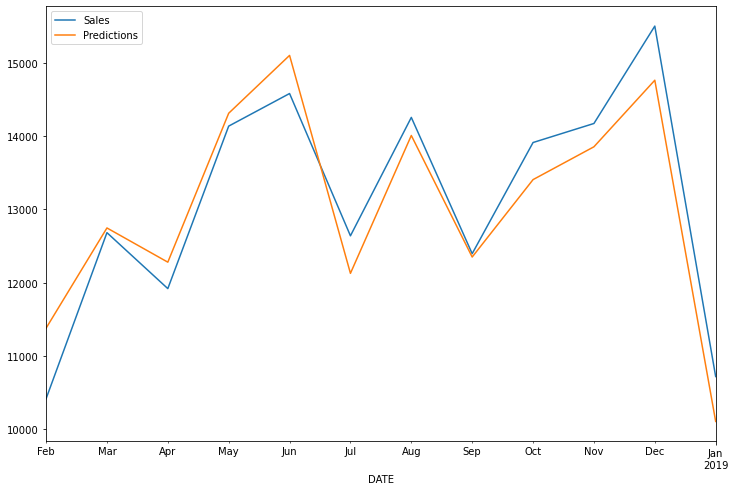

In [457]:
test.plot(figsize=(12,8))

#### save model

In [458]:
model.save('my_rnn_model.h5')

#### load model

In [459]:
from keras.models import load_model
new_model = load_model('my_rnn_model.h5')

In [460]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


#### Exercise 5

In [461]:
df = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\Data\\Miles_Traveled.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [462]:
df.head()

TRFVOLUSM227NFWA
DATE                        
1970-01-01           80173.0
1970-02-01           77442.0
1970-03-01           90223.0
1970-04-01           89956.0
1970-05-01           97972.0

In [463]:
df.columns = ['Value']

<AxesSubplot:xlabel='DATE'>

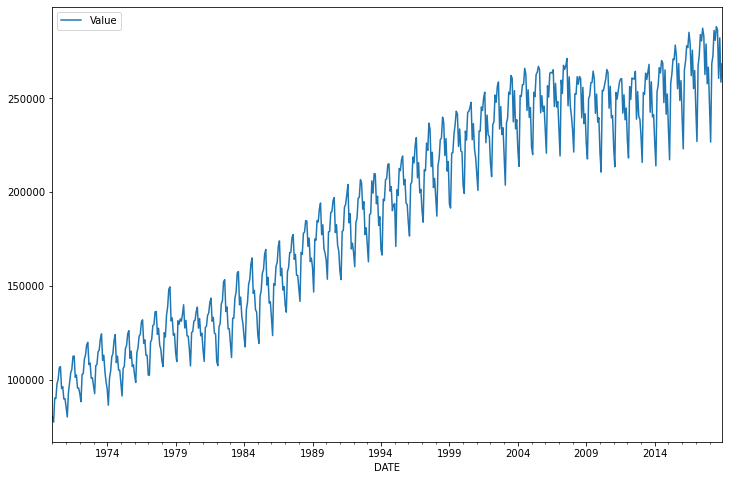

In [464]:
df.plot(figsize=(12,8))

In [465]:
from statsmodels.tsa.seasonal import seasonal_decompose

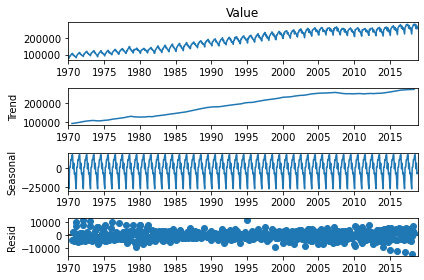

In [467]:
results = seasonal_decompose(df['Value'])
results.plot();

In [468]:
#train-test split

len(df)

588

In [469]:
train_len = len(df)-12

In [470]:
train = df.iloc[:train_len]
test = df.iloc[train_len:]

In [471]:
len(test)

12

In [472]:
from sklearn.preprocessing import MinMaxScaler

In [473]:
scaler = MinMaxScaler()

In [474]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [475]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [480]:
n_input = 24 #Forecast for 2 years(24 months)
n_features=1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

#### Create model

In [481]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [482]:
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [483]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [484]:
model.fit_generator(generator,epochs=50)

Epoch 1/50
552/552 [==============================] - 3s 6ms/step - loss: 0.0115
Epoch 2/50
552/552 [==============================] - 3s 6ms/step - loss: 0.0072
Epoch 3/50
552/552 [==============================] - 3s 6ms/step - loss: 0.0058
Epoch 4/50
552/552 [==============================] - 3s 6ms/step - loss: 0.0051
Epoch 5/50
552/552 [==============================] - 3s 6ms/step - loss: 0.0048
Epoch 6/50
552/552 [==============================] - 3s 6ms/step - loss: 0.0027
Epoch 7/50
552/552 [==============================] - 3s 6ms/step - loss: 0.0019
Epoch 8/50
552/552 [==============================] - 3s 6ms/step - loss: 0.0021
Epoch 9/50
552/552 [==============================] - 3s 6ms/step - loss: 0.0017
Epoch 10/50
552/552 [==============================] - 3s 6ms/step - loss: 0.0016
Epoch 11/50
552/552 [==============================] - 3s 6ms/step - loss: 0.0015
Epoch 12/50
552/552 [==============================] - 3s 6ms/step - loss: 0.0016
Epoch 13/50
552/552 [====

In [485]:
model.history.history.keys()

dict_keys(['loss'])

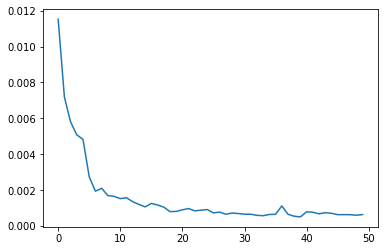

In [486]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [487]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [488]:
true_predictions = scaler.inverse_transform(test_predictions)

In [489]:
test['Predictions'] = true_predictions

In [490]:
test

Value    Predictions
DATE                               
2018-01-01  245695.0  242408.524937
2018-02-01  226660.0  230396.792401
2018-03-01  268480.0  265040.283099
2018-04-01  272475.0  272070.969016
2018-05-01  286164.0  281549.621822
2018-06-01  280877.0  280586.219038
2018-07-01  288145.0  285830.248444
2018-08-01  286608.0  280706.200243
2018-09-01  260595.0  267118.610291
2018-10-01  282174.0  274566.878343
2018-11-01  258590.0  258873.486879
2018-12-01  268413.0  262715.562805

<AxesSubplot:xlabel='DATE'>

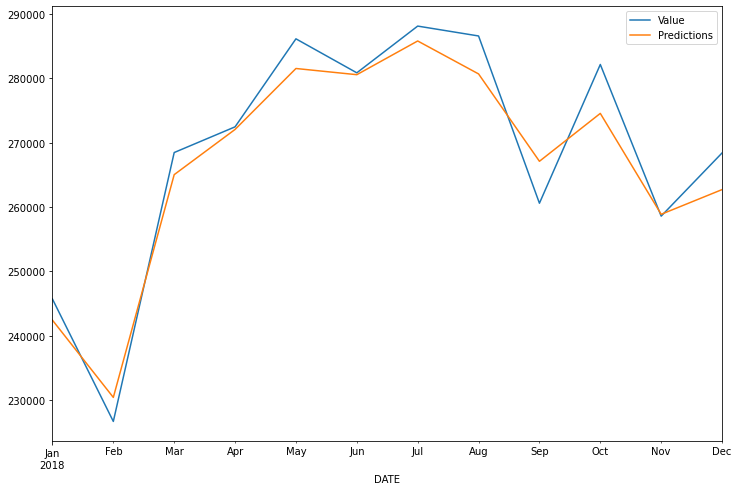

In [491]:
test.plot(figsize=(12,8))

In [492]:
model.save('Exercise_TSG_model.h5')

#### Multivariate Time Series with RNN

Till now we have seen univariate time series analysis. Lets also see how to do time-series for multiple continuous variables

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).
Original source of the dataset:

http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

In [493]:
df = pd.read_csv('C:\\Users\\Suraj\\Time-Series-Analysis\\MultiVariate-RNN-with-TensorFlow-and-Keras-master\\DATA\\energydata_complete.csv',index_col='date',infer_datetime_format=True)

In [494]:
df.head()

Appliances  lights     T1       RH_1    T2       RH_2  \
date                                                                         
2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

                        T3       RH_3         T4       RH_4         T5   RH_5  \
date                                                                            
2016-01-11 17:00:00  19.79  44.730000  19.000000  45.566667  17.166667  55.20   
2016-01-11 17:10:00  19.79  44.790000  19.000000  45.992500  17.166667  55.20   
2016-01-11 17:20:00  19.79  44.933333  18.926667  45.890000  17.166667  55.09   
2016-01-11 17:30:00  19.79  45.000000  18.890000  45.723333  17.166667  55.09   
2016-01-11 17:40:00  19.79  45.000000  18.890000  45.530000  17.200000  55.09   

                           T6       RH_6         T7       RH_7    T8  \
date                                                                   
2016-01-11 17:00:00  7.026667  84.256667  17.200000  41.626667  18.2   
2016-01-11 17:10:00  6.833333  84.063333  17.200000  41.560000  18.2   
2016-01-11 17:20:00  6.560000  83.156667  17.200000  41.433333  18.2   
2016-01-11 17:30:00  6.433333  83.423333  17.133333  41.290000  18.1   
2016-01-11 17:40:00  6.366667  84.893333  17.200000  41.230000  18.1   

                          RH_8         T9   RH_9     T_out  Press_mm_hg  \
date                                                                      
2016-01-11 17:00:00  48.900000  17.033333  45.53  6.600000        733.5   
2016-01-11 17:10:00  48.863333  17.066667  45.56  6.483333        733.6   
2016-01-11 17:20:00  48.730000  17.000000  45.50  6.366667        733.7   
2016-01-11 17:30:00  48.590000  17.000000  45.40  6.250000        733.8   
2016-01-11 17:40:00  48.590000  17.000000  45.40  6.133333        733.9   

                     RH_out  Windspeed  Visibility  Tdewpoint        rv1  \
date                                                                       
2016-01-11 17:00:00    92.0   7.000000   63.000000        5.3  13.275433   
2016-01-11 17:10:00    92.0   6.666667   59.166667        5.2  18.606195   
2016-01-11 17:20:00    92.0   6.333333   55.333333        5.1  28.642668   
2016-01-11 17:30:00    92.0   6.000000   51.500000        5.0  45.410389   
2016-01-11 17:40:00    92.0   5.666667   47.666667        4.9  10.084097   

                           rv2  
date                            
2016-01-11 17:00:00  13.275433  
2016-01-11 17:10:00  18.606195  
2016-01-11 17:20:00  28.642668  
2016-01-11 17:30:00  45.410389  
2016-01-11 17:40:00  10.084097

In [495]:
df.index

Index(['2016-01-11 17:00:00', '2016-01-11 17:10:00', '2016-01-11 17:20:00',
       '2016-01-11 17:30:00', '2016-01-11 17:40:00', '2016-01-11 17:50:00',
       '2016-01-11 18:00:00', '2016-01-11 18:10:00', '2016-01-11 18:20:00',
       '2016-01-11 18:30:00',
       ...
       '2016-05-27 16:30:00', '2016-05-27 16:40:00', '2016-05-27 16:50:00',
       '2016-05-27 17:00:00', '2016-05-27 17:10:00', '2016-05-27 17:20:00',
       '2016-05-27 17:30:00', '2016-05-27 17:40:00', '2016-05-27 17:50:00',
       '2016-05-27 18:00:00'],
      dtype='object', name='date', length=19735)

In [496]:
df.shape

(19735, 28)

In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 

<AxesSubplot:xlabel='date'>

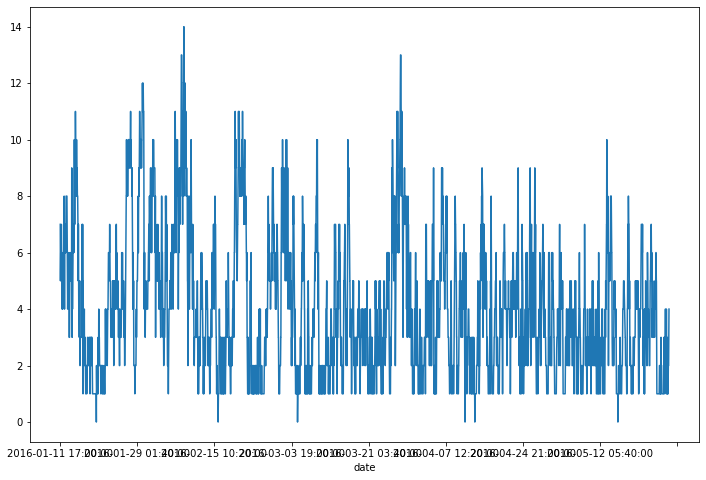

In [498]:
df['Windspeed'].plot(figsize=(12,8))

<AxesSubplot:xlabel='date'>

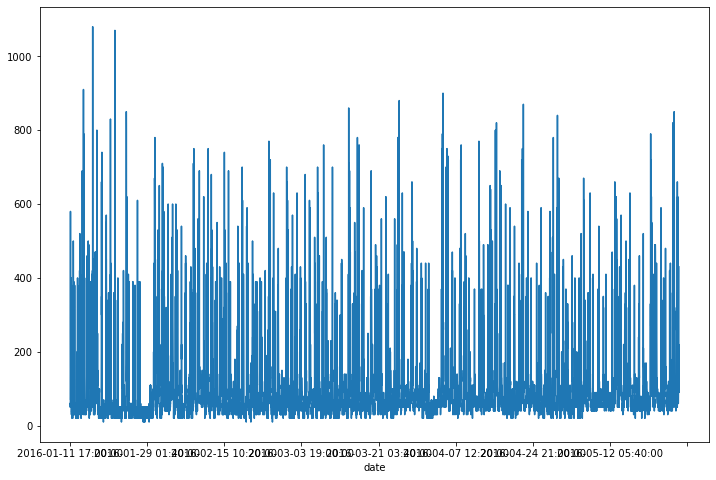

In [499]:
df['Appliances'].plot(figsize=(12,8))

In [501]:
df = df.loc['2016-05-01':]

In [502]:
df = df.round(2)

In [503]:
len(df)

3853

In [504]:
# How many rows per day? We know its every 10 min
24*60/10

144.0

In [505]:
test_days = 2

In [506]:
test_ind = test_days*144

In [507]:
test_ind

288

In [508]:
train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [509]:
train.shape

(3565, 28)

In [510]:
test.shape

(288, 28)

In [511]:
from sklearn.preprocessing import MinMaxScaler

In [512]:
scaler = MinMaxScaler()

In [513]:
scaler.fit(train)

MinMaxScaler()

In [514]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [515]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [516]:
# define generator
length = 144 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [517]:
len(scaled_train)

3565

In [518]:
len(generator) 

3421

In [519]:
# What does the first batch look like?
X,y = generator[0]

In [521]:
X.shape

(1, 144, 28)

In [522]:
y.shape

(1, 28)

In [520]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03896104 0.         0.13798978 ... 0.14319527 0.75185111 0.75185111]
Predict this y: 
 [[0.03896104 0.         0.30834753 0.29439421 0.16038492 0.49182278
  0.0140056  0.36627907 0.24142857 0.24364791 0.12650602 0.36276002
  0.12       0.28205572 0.06169297 0.15759185 0.34582624 0.39585974
  0.09259259 0.39649608 0.18852459 0.96052632 0.59210526 0.1
  0.58333333 0.13609467 0.4576746  0.4576746 ]]


In [523]:
model = Sequential()

# Simple RNN layer
model.add(LSTM(100,input_shape=(length,scaled_train.shape[1])))

# Final Prediction (one neuron per feature)
model.add(Dense(scaled_train.shape[1]))

model.compile(optimizer='adam', loss='mse')

In [524]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               51600     
_________________________________________________________________
dense_3 (Dense)              (None, 28)                2828      
Total params: 54,428
Trainable params: 54,428
Non-trainable params: 0
_________________________________________________________________


In [525]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, 
                                           length=length, batch_size=batch_size)

In [526]:
model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
3421/3421 [==============================] - 111s 32ms/step - loss: 0.0112 - val_loss: 0.0109
Epoch 2/20
3421/3421 [==============================] - 113s 33ms/step - loss: 0.0078 - val_loss: 0.0086
Epoch 3/20
3421/3421 [==============================] - 112s 33ms/step - loss: 0.0075 - val_loss: 0.0087


In [527]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

<AxesSubplot:>

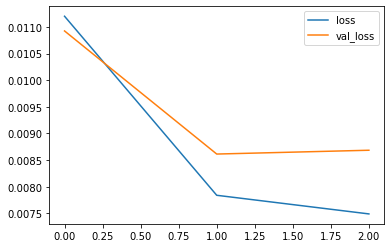

In [528]:
losses = pd.DataFrame(model.history.history)
losses.plot()

#### Evaluate on Test Data

In [529]:
first_eval_batch = scaled_train[-length:]

In [530]:
first_eval_batch

array([[0.1038961 , 0.        , 0.72231687, ..., 0.53550296, 0.15909546,
        0.15909546],
       [0.11688312, 0.        , 0.73424191, ..., 0.52662722, 0.40344207,
        0.40344207],
       [0.11688312, 0.        , 0.73424191, ..., 0.51775148, 0.20452271,
        0.20452271],
       ...,
       [0.18181818, 0.        , 0.70017036, ..., 0.50118343, 0.33340004,
        0.33340004],
       [0.09090909, 0.        , 0.70017036, ..., 0.51952663, 0.78747248,
        0.78747248],
       [0.1038961 , 0.        , 0.70017036, ..., 0.53846154, 0.77286372,
        0.77286372]])

In [531]:
first_eval_batch = first_eval_batch.reshape((1, length, scaled_train.shape[1]))

In [532]:
model.predict(first_eval_batch)

array([[ 0.0809886 , -0.03996199,  0.7047361 ,  0.39383635,  0.5549771 ,
         0.44339862,  0.40345043,  0.43014318,  0.703686  ,  0.41790468,
         0.29972595,  0.37469044,  0.6526042 ,  0.01662533,  0.62104905,
         0.41421336,  0.49207985,  0.34380585,  0.53625333,  0.35406536,
         0.6342976 ,  0.5257753 ,  0.44360593,  0.21370868,  0.57038957,
         0.55498844,  0.48537025,  0.48147097]], dtype=float32)

In [533]:
scaled_test[0]

array([0.19480519, 0.        , 0.70017036, 0.3920434 , 0.53007217,
       0.41064526, 0.40616246, 0.41913319, 0.72714286, 0.4115245 ,
       0.30722892, 0.36445121, 0.66777778, 0.        , 0.61119082,
       0.39840637, 0.51618399, 0.32953105, 0.53703704, 0.34024896,
       0.6057377 , 0.52631579, 0.41881579, 0.2       , 0.55283333,
       0.53372781, 0.76305783, 0.76305783])

In [534]:
len(test)

288

In [535]:
length

144

In [536]:
n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [537]:
true_predictions = scaler.inverse_transform(test_predictions)

In [538]:
test.head()

Appliances  lights     T1   RH_1     T2   RH_2     T3  \
date                                                                         
2016-05-25 18:10:00         170       0  24.50  37.86  24.00  34.27  25.00   
2016-05-25 18:20:00         310       0  24.50  37.30  23.86  34.33  24.94   
2016-05-25 18:30:00         120       0  24.50  36.96  23.73  34.33  24.85   
2016-05-25 18:40:00         120       0  24.50  37.00  23.70  34.40  24.84   
2016-05-25 18:50:00         120       0  24.49  37.07  23.68  34.52  24.84   

                      RH_3     T4   RH_4     T5   RH_5     T6  RH_6     T7  \
date                                                                         
2016-05-25 18:10:00  36.70  24.29  37.79  21.20  51.37  19.32  1.00  23.29   
2016-05-25 18:20:00  36.67  24.29  37.79  21.29  51.14  19.39  1.00  23.32   
2016-05-25 18:30:00  36.50  24.29  37.79  21.32  50.73  19.43  1.00  23.36   
2016-05-25 18:40:00  36.45  24.29  37.90  21.39  50.35  19.36  1.00  23.39   
2016-05-25 18:50:00  36.49  24.28  37.93  21.39  50.35  19.25  1.66  23.39   

                      RH_7     T8   RH_8     T9   RH_9  T_out  Press_mm_hg  \
date                                                                         
2016-05-25 18:10:00  34.70  24.39  39.13  22.00  37.23  16.48        756.1   
2016-05-25 18:20:00  34.76  24.41  39.62  22.00  37.36  16.47        756.1   
2016-05-25 18:30:00  34.94  24.50  40.34  22.03  37.39  16.45        756.1   
2016-05-25 18:40:00  35.00  24.55  40.54  22.10  37.72  16.43        756.1   
2016-05-25 18:50:00  35.05  24.54  40.59  22.10  37.81  16.42        756.1   

                     RH_out  Windspeed  Visibility  Tdewpoint    rv1    rv2  
date                                                                         
2016-05-25 18:10:00   55.83        2.0       38.17       7.62  38.14  38.14  
2016-05-25 18:20:00   55.67        2.0       36.33       7.53  31.16  31.16  
2016-05-25 18:30:00   55.50        2.0       34.50       7.45   4.40   4.40  
2016-05-25 18:40:00   55.33        2.0       32.67       7.37  27.12  27.12  
2016-05-25 18:50:00   55.17        2.0       30.83       7.28  10.27  10.27

In [539]:
true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns)

In [540]:
true_predictions.head()

Appliances    lights         T1       RH_1         T2       RH_2  \
0   82.361223 -1.198860  24.526801  37.909575  24.310565  35.371496   
1   68.036926 -1.940249  24.525827  37.997777  24.406172  35.539709   
2   59.243047 -2.610617  24.522707  38.186065  24.455916  35.809727   
3   53.533012 -3.143309  24.515714  38.408548  24.471165  36.108017   
4   49.245780 -3.564508  24.512072  38.667757  24.471572  36.432516   

          T3       RH_3         T4       RH_4         T5       RH_5  \
0  24.980636  36.908309  24.125802  37.930619  21.150180  51.975446   
1  24.935957  37.009424  24.086157  38.138991  21.186793  52.671169   
2  24.908066  37.155705  24.053942  38.370505  21.219011  53.160168   
3  24.898946  37.321150  24.035500  38.608333  21.258902  53.578348   
4  24.906136  37.501326  24.031741  38.856487  21.307371  53.972148   

          T6      RH_6         T7       RH_7         T8       RH_8         T9  \
0  18.910314  1.960778  23.358712  35.057080  24.248509  39.467884  21.995768   
1  18.816374  3.581600  23.326116  35.449286  24.189483  39.915193  22.017777   
2  18.715959  5.335443  23.314301  35.891672  24.131457  40.394075  22.041251   
3  18.597616  7.123613  23.308759  36.348864  24.077705  40.879548  22.065204   
4  18.494154  8.882900  23.313835  36.809190  24.032190  41.367943  22.095271   

        RH_9      T_out  Press_mm_hg     RH_out  Windspeed  Visibility  \
0  37.529678  17.176862   756.087677  57.714051   2.137087   39.223374   
1  37.675687  17.324096   756.108585  59.026204   2.254111   38.255665   
2  37.870411  17.357548   755.994664  60.594165   2.397706   37.323984   
3  38.087722  17.354371   755.815706  62.195712   2.554056   36.341534   
4  38.316677  17.339582   755.601030  63.817725   2.719663   35.358329   

   Tdewpoint        rv1        rv2  
0   7.979305  24.263951  24.069104  
1   8.377988  24.127473  23.996209  
2   8.781385  24.155025  23.956479  
3   9.163022  24.126792  23.895171  
4   9.526825  24.135381  23.864106

In [541]:
model.save("multivariate.h5")